In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
pd.set_option('display.max_columns',100) #to display all columns below

In [2]:
df=pd.read_csv("./data/application_data.csv")
df1=df.copy()
df1.shape

(307511, 122)

## **Taking 40% Sample of the data for previous data**

In [3]:
import random
num_lines=sum(1 for i in open("./data/previous_application.csv"))
num_lines

1670215

In [4]:
size=round(num_lines*0.6)
size

1002129

In [5]:
ids=random.sample(range(1,num_lines),size)
len(ids)

1002129

In [6]:
df_prev=pd.read_csv("./data/previous_application.csv",skiprows=ids)
df_prev.shape

(668085, 37)

## **Identifying the best 20 columns for analysis**

### **Analysing first 25 columns**

In [7]:
df1=df.iloc[:,0:25]
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0


In [8]:
df1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
dtype: int64

In [9]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
## best 20 columns to do the analysis
df=df.loc[:,['SK_ID_CURR','TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT','AMT_GOODS_PRICE','NAME_TYPE_SUITE','OWN_CAR_AGE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY','OBS_30_CNT_SOCIAL_CIRCLE']]
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,Unaccompanied,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.0,0.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,Family,NaN,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.0,1,1,MONDAY,11,School,0.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Unaccompanied,26.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.0,2,2,MONDAY,9,Government,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Unaccompanied,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,NaN,NaN,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Unaccompanied,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.0,2,2,THURSDAY,11,Religion,0.0,0.0,0.0


# **PART-1 CLEANING AND ANALYSIS OF DATA**

In [11]:
df.shape

(307511, 29)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
OWN_CAR_AGE                    104582 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [13]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.072330e+05,104582.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,306490.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,5.383962e+05,12.061091,0.020868,-16036.995067,63815.045904,2.152665,2.052463,2.031521,12.063419,0.006402,0.007000,1.422245
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,3.694465e+05,11.944812,0.013831,4363.988632,141275.766519,0.910682,0.509034,0.502737,3.265832,0.083849,0.110757,2.400989
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.050000e+04,0.000000,0.000290,-25229.000000,-17912.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,5.000000,0.010006,-19682.000000,-2760.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,4.500000e+05,9.000000,0.018850,-15750.000000,-1213.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,15.000000,0.028663,-12413.000000,-289.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,2.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,4.050000e+06,91.000000,0.072508,-7489.000000,365243.000000,20.000000,3.000000,3.000000,23.000000,4.000000,9.000000,348.000000


In [14]:
100*df.isnull().sum()/df.shape[0]  #this means only 2 columns have null values and later we will clean them

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
OWN_CAR_AGE                    65.990810
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCES

#### **From above analysis we see that OWN_CAR_AGE Columns have more than 50% data hence we will drop it and since CNT_FAM_MEMBERS has less then 0.1% missing data hence we can drop the rows for which that is missing.** ####

In [15]:
##dropping OWN_CAR_AGE column and removing missing values for rows where CNT_FAM_MEMBERS is missing.
df.drop('OWN_CAR_AGE',axis=1,inplace=True)

In [16]:
df[df.CNT_FAM_MEMBERS.isnull()==True]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,NaN,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,Managers,NaN,2,2,THURSDAY,15,Insurance,NaN,NaN,3.0
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,NaN,NaN,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,Accountants,NaN,2,2,FRIDAY,14,Business Entity Type 2,0.0,0.0,1.0


In [17]:
df=df[~df.CNT_FAM_MEMBERS.isnull()==True]
df=df[~df.AMT_GOODS_PRICE.isnull()==True]
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.0,0.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.0,1,1,MONDAY,11,School,0.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.0,2,2,MONDAY,9,Government,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,NaN,NaN,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.0,2,2,THURSDAY,11,Religion,0.0,0.0,0.0


In [18]:
df.isnull().sum() #removed nulls from rows <0.1% null values

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                 1014
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
AMT_REQ_CREDIT_BUREAU_HOUR     41473
AMT_REQ_CREDIT_BUREAU_DAY      41473
O

### **METRICS TO SUBSTITUTE FOR THE MISSING VALUES**

In [19]:
### we have 4 columnns left with null values lets take those in a different dataframe and analyse the metric
df_missing=df.loc[:,['NAME_TYPE_SUITE','OCCUPATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','OBS_30_CNT_SOCIAL_CIRCLE']]
df_missing.describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE
count,265760.000000,265760.000000,306212.000000
mean,0.006404,0.007006,1.422394
std,0.083863,0.110806,2.401155
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000
max,4.000000,9.000000,348.000000


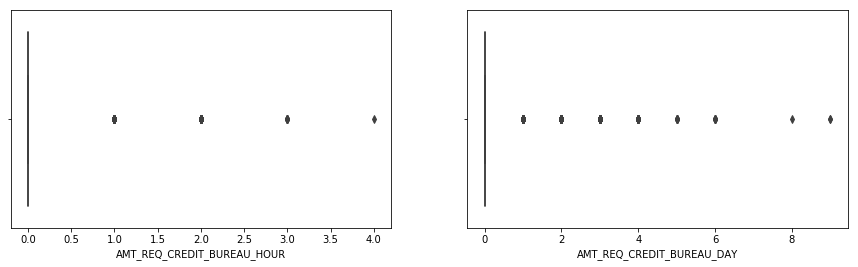

In [20]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.boxplot(df_missing.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.subplot(1,2,2)
sns.boxplot(df_missing.AMT_REQ_CREDIT_BUREAU_DAY)

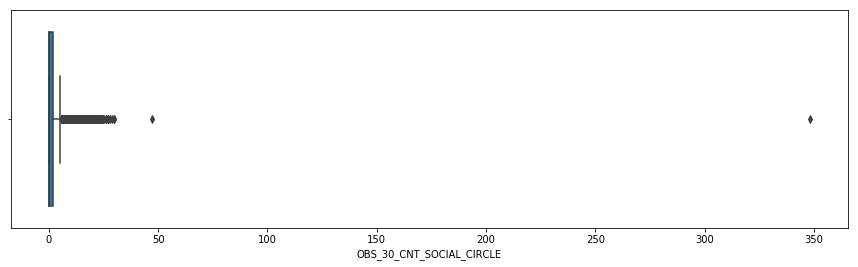

In [21]:
plt.figure(figsize=[15,4])
sns.boxplot(df_missing.OBS_30_CNT_SOCIAL_CIRCLE)

#### **METRIC TO SUBSTITUTE FOR 3 NUMERIC COLUMNS**

- **OBS_30_CNT_SOCIAL_CIRCLE** - Since outliers are present we will take **median** as the metric and hence substitute 0.00 for missing values.
- **AMT_REQ_CREDIT_BUREAU_HOUR** - Since outliers are present we will take **median** as the metric and hence substitute 0.00 for missing values.
- **AMT_REQ_CREDIT_BUREAU_DAY** - Since outliers are present we will take **median** as the metric and hence substitute 0.00 for missing values.


In [22]:
df_missing.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [23]:
df_missing.OCCUPATION_TYPE.value_counts()

Laborers                 55134
Sales staff              32064
Core staff               27531
Managers                 21348
Drivers                  18590
High skill tech staff    11371
Accountants               9802
Medicine staff            8528
Security staff            6713
Cooking staff             5940
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

#### **METRIC TO SUBSTITUTE FOR 2 CATEGORICAL COLUMNS**

- **NAME_TYPE_SUITE** - Since outliers are present we will take **mode** as the metric and hence substitute 'Unaccompanied' for missing values.

In [24]:
df['OCCUPATION_TYPE'].isnull().sum()

96334

- **OCCUPATION_TYPE** - IN this case we see there are around 30% missing values so lets analyse why are they missing and can we replace it with the mode value ie'Laborers'.

**ANALYSIS FOR OCCUPATION TYPE**
- Lets check the null columns and try to find some relation as to why those columns are missing the data.

In [25]:
df[df['OCCUPATION_TYPE'].isnull()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,NaN,2.0,2,2,WEDNESDAY,14,XNA,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,NaN,2.0,2,2,FRIDAY,7,XNA,0.0,0.0,0.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,NaN,2.0,3,3,FRIDAY,12,XNA,0.0,0.0,0.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,NaN,1.0,1,1,WEDNESDAY,11,Military,0.0,0.0,0.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,NaN,2.0,2,2,WEDNESDAY,13,Business Entity Type 3,0.0,0.0,0.0


In [26]:
##Lets analyse NAME_INCOME_TYPE column
df['NAME_INCOME_TYPE'].value_counts()

Working                 158589
Commercial associate     71570
Pensioner                55339
State servant            21680
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [27]:
df[df['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts() 

Pensioner               55337
Working                 24890
Commercial associate    12292
State servant            3785
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

#### **OBSERVATION** - 
Here we observe that all the **pensioners** have null as the occupation type ,this means that they are not working hence are not given a specific occupation type. 

#### **SOLUTION** - 
So we can't replace the null values directly with 'Laborers' as it will wrong analysis so lets replace it with a new category
called **'Retired'** and replace rest of the null values with 'Laborers'

#### **SUBSTITUTING THE METRIC FOR 2 CATEGORICAL COLUMNS AND NUMERICAL COLUMNS**

In [28]:
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna('Unaccompanied')
df[['OBS_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY']]=df[['OBS_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY']].fillna(0.00)
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
AMT_REQ_CREDIT_BUREAU_HOUR         0
AMT_REQ_CREDIT_BUREAU_DAY          0
O

In [29]:
## Creating a new 'Retired' value for pensioners in income_type
df.loc[df['NAME_INCOME_TYPE']=='Pensioner','OCCUPATION_TYPE']='Retired'
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('Laborers')
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
ORGANIZATION_TYPE              0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
OBS_30_CNT_SOCIAL_CIRCLE       0
dtype: int64

## Logic identify the correct data type we use the following-
####  if a column has a unique values around 40,then that column can be categorical column else it will be a continuous

In [30]:
df.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CODE_GENDER                         3
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
NAME_FAMILY_STATUS                  5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    19
HOUR_APPR_PROCESS_START            24
OBS_30_CNT_SOCIAL_CIRCLE           33
ORGANIZATION_TYPE                  58
REGION_POPULATION_RELATIVE         81
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2547
AMT_CREDIT                       5603
DAYS_EMPLOYED                   12572
DAYS_BIRTH  

In [31]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                     307233 non-null int64
TARGET                         307233 non-null int64
NAME_CONTRACT_TYPE             307233 non-null object
CODE_GENDER                    307233 non-null object
FLAG_OWN_CAR                   307233 non-null object
FLAG_OWN_REALTY                307233 non-null object
CNT_CHILDREN                   307233 non-null int64
AMT_INCOME_TOTAL               307233 non-null float64
AMT_CREDIT                     307233 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                307233 non-null object
NAME_INCOME_TYPE               307233 non-null object
NAME_EDUCATION_TYPE            307233 non-null object
NAME_FAMILY_STATUS             307233 non-null object
NAME_HOUSING_TYPE              307233 non-null object
REGION_POPULATION_RELATIVE     307233 non-null float64
DAYS_BIRTH              

### **We will convert the below columns data types-**
- **CNT_CHILDREN** - From int64 to categorical.
- **CNT_FAM_MEMBERS** - From float64 to categorical.
- **REGION_RATING_CLIENT** - From int64 to categorical.
- **REGION_RATING_CLIENT_W_CITY** - From int64 to categorical.
- **HOUR_APPR_PROCESS_START** - From int64 to categorical.
- **DAYS_BIRTH** - From int64 to float64.
- **DAYS_EMPLOYED** - From int64 to float64.
- **TARGET** - From int64 to categorical.



In [32]:
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].astype(str)
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(str)
df['REGION_RATING_CLIENT'] = df['REGION_RATING_CLIENT'].astype(str)
df['REGION_RATING_CLIENT_W_CITY'] = df['REGION_RATING_CLIENT_W_CITY'].astype(str)
df['HOUR_APPR_PROCESS_START'] = df['HOUR_APPR_PROCESS_START'].astype(int)
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].astype(float)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].astype(float)
df['TARGET']=df['TARGET'].apply(lambda x : 'Yes' if x==1 else 'No')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                     307233 non-null int64
TARGET                         307233 non-null object
NAME_CONTRACT_TYPE             307233 non-null object
CODE_GENDER                    307233 non-null object
FLAG_OWN_CAR                   307233 non-null object
FLAG_OWN_REALTY                307233 non-null object
CNT_CHILDREN                   307233 non-null object
AMT_INCOME_TOTAL               307233 non-null float64
AMT_CREDIT                     307233 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                307233 non-null object
NAME_INCOME_TYPE               307233 non-null object
NAME_EDUCATION_TYPE            307233 non-null object
NAME_FAMILY_STATUS             307233 non-null object
NAME_HOUSING_TYPE              307233 non-null object
REGION_POPULATION_RELATIVE     307233 non-null float64
DAYS_BIRTH            

In [34]:
## converting DAYS_BIRTH and DAYS_EMPLOYED to years
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])/365
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])/365

In [35]:
df[['DAYS_BIRTH','DAYS_EMPLOYED']].head()

,DAYS_BIRTH,DAYS_EMPLOYED
0,25.920548,1.745205
1,45.931507,3.254795
2,52.180822,0.616438
3,52.068493,8.326027
4,54.608219,8.323288


### **CHECKING OUTLIERS FOR DIFFERENT VARIABLES**

In [36]:
df.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE
count,307233.000000,3.072330e+05,3.072330e+05,3.072330e+05,307233.000000,307233.000000,307233.000000,307233.000000,307233.000000,307233.000000,307233.000000
mean,278169.312951,1.688332e+05,5.993150e+05,5.383962e+05,0.020870,43.941720,185.638330,12.063092,0.005540,0.006061,1.417667
std,102788.267734,2.372157e+05,4.025177e+05,3.694465e+05,0.013832,11.955729,382.113109,3.265930,0.078029,0.103084,2.398559
min,100002.000000,2.565000e+04,4.500000e+04,4.050000e+04,0.000290,20.517808,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189138.000000,1.125000e+05,2.700000e+05,2.385000e+05,0.010006,34.013699,2.556164,10.000000,0.000000,0.000000,0.000000
50%,278192.000000,1.485000e+05,5.146020e+05,4.500000e+05,0.018850,43.156164,6.079452,12.000000,0.000000,0.000000,0.000000
75%,367125.000000,2.025000e+05,8.086500e+05,6.795000e+05,0.028663,53.928767,15.643836,14.000000,0.000000,0.000000,2.000000
max,456255.000000,1.170000e+08,4.050000e+06,4.050000e+06,0.072508,69.120548,1000.665753,23.000000,4.000000,9.000000,348.000000


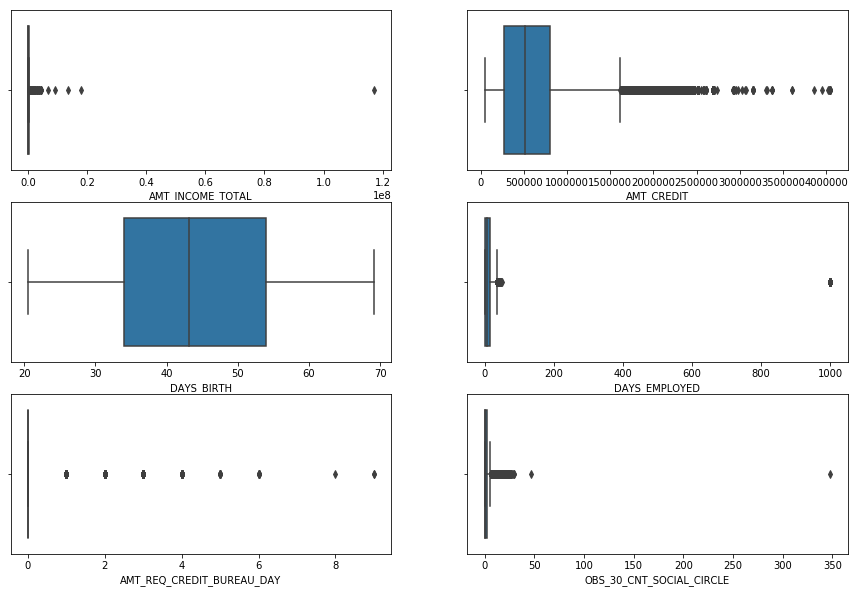

In [37]:
plt.figure(figsize=[15,10])
plt.subplot(3,2,1)
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.subplot(3,2,2)
sns.boxplot(df.AMT_CREDIT)
plt.subplot(3,2,3)
sns.boxplot(df.DAYS_BIRTH)
plt.subplot(3,2,4)
sns.boxplot(df.DAYS_EMPLOYED)
plt.subplot(3,2,5)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_DAY)
plt.subplot(3,2,6)
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)

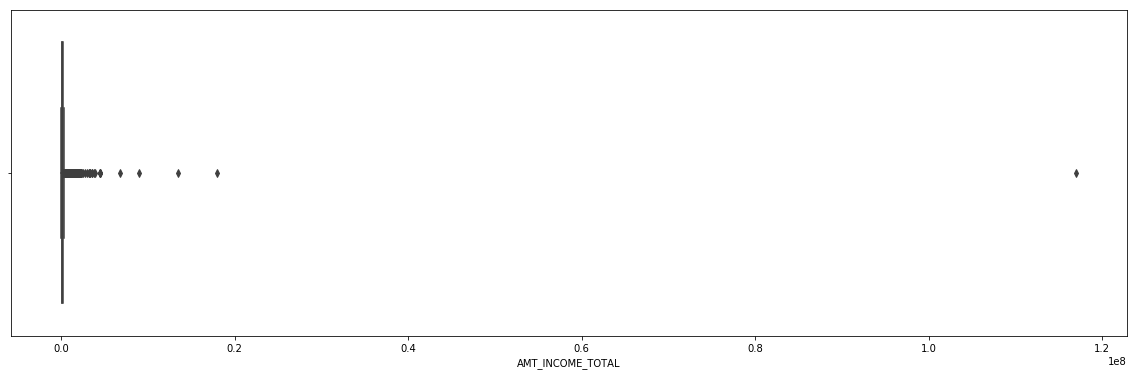

In [38]:
plt.figure(figsize=[20,6])
sns.boxplot(df.AMT_INCOME_TOTAL)

### **ANALYSIS FOR THE OUTLIERS**

#### 1.AMT_INCOME_TOTAL ####
- There are many points which lie outside the quartile ranges and hance this column contains a lot of outliers
- Calculating the number of outliers-

In [39]:
Q1 = df.AMT_INCOME_TOTAL.quantile(0.25)
Q3 = df.AMT_INCOME_TOTAL.quantile(0.75)
IQR = Q3 - Q1
Q3+IQR

292500.0

In [40]:
### Calculating the number of outliers for amount_total_income column by calculating the IQR
len(df.AMT_INCOME_TOTAL[(df.AMT_INCOME_TOTAL > (Q3 + 1.5 * IQR))])

14029

In [41]:
### REMOVING THE OUTLIERS FOR BETTER ANALYSIS
df=df[~(df.AMT_INCOME_TOTAL > 2*(Q3 + 1.5 * IQR))]
len(df)

306479

**CONCLUSION** - There are around 5568 outliers in this column and what we observe is few of them have income over 4 million which is much greater than the mean

#### 2.AMT_CREDIT

In [42]:
Q1 = df.AMT_CREDIT.quantile(0.25)
Q3 = df.AMT_CREDIT.quantile(0.75)
IQR = Q3 - Q1
IQR

538650.0

In [43]:
### Calculating the number of outliers for amount_total_income column by calculating the IQR
len(df.AMT_CREDIT[(df.AMT_CREDIT > (Q3 + 1.5 * IQR))])

6392

In [44]:
### REMOVING THE OUTLIERS FOR BETTER ANALYSIS
df=df[~(df.AMT_CREDIT > (Q3 + 1.5 * IQR))]
len(df)

300087

#### 3.DAYS_EMPLOYED

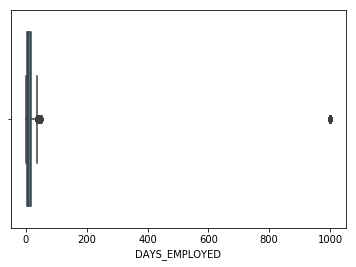

In [45]:
sns.boxplot(df.DAYS_EMPLOYED)

In [46]:
Q1 = df.DAYS_EMPLOYED.quantile(0.25)
Q3 = df.DAYS_EMPLOYED.quantile(0.75)
IQR = Q3 - Q1
Q3+1.5*IQR

35.47945205479452

In [47]:
### Calculating the number of outliers for amount_total_income column by calculating the IQR
len(df[(df.DAYS_EMPLOYED > 2*(Q3 + 1.5 * IQR))])

54509

In [48]:
df[(df.DAYS_EMPLOYED > 2*(Q3 + 1.5 * IQR))].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE
8,100011,No,Cash loans,F,N,Y,0,112500.000,1019610.0,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,55.065753,1000.665753,Retired,2.0,2,2,WEDNESDAY,14,XNA,0.0,0.0,1.0
11,100015,No,Cash loans,F,N,Y,0,38419.155,148365.0,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,55.936986,1000.665753,Retired,2.0,2,2,FRIDAY,7,XNA,0.0,0.0,0.0
23,100027,No,Cash loans,F,N,Y,0,83250.000,239850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,68.019178,1000.665753,Retired,2.0,3,3,FRIDAY,12,XNA,0.0,0.0,0.0
38,100045,No,Cash loans,F,N,Y,0,99000.000,247275.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,65.534247,1000.665753,Retired,2.0,2,2,FRIDAY,11,XNA,0.0,0.0,0.0
43,100050,No,Cash loans,F,N,Y,0,108000.000,746280.0,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,64.515068,1000.665753,Retired,1.0,2,2,WEDNESDAY,9,XNA,0.0,0.0,0.0


**OBSERVATION AND ANALYSIS** - Here we see that for all the retired people who are getting **pensions** the DAYS_EMPLOYED is more than 1000 years which is wrong but we can't drop those values hence we will replace those VALUES with the max cap value.

In [49]:
### Replacing the outliers with max value of Days_Employed

### **BINNING DIFFERENT VARIABLES**

In [50]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE
0,100002,Yes,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.0,0.0,2.0
1,100003,No,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,Core staff,2.0,1,1,MONDAY,11,School,0.0,0.0,1.0
2,100004,No,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,Laborers,1.0,2,2,MONDAY,9,Government,0.0,0.0,0.0
3,100006,No,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,0.0,0.0,2.0
4,100007,No,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,Core staff,1.0,2,2,THURSDAY,11,Religion,0.0,0.0,0.0


In [51]:
df.HOUR_APPR_PROCESS_START.describe()

count    300087.000000
mean         12.048229
std           3.261205
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

In [52]:
### binning HOUR_APPR_PROCESS_START variable according to morning,afternoon,evening and night
### 5-12 morning,12-18 afternoon,18-24 evening,0-5 night
df['Hourly_Bucket'] = pd.cut(df.HOUR_APPR_PROCESS_START, bins = [-1,5,12,18,24], labels = ["night", "morning", "afternoon", "evening"])
df['Hourly_Bucket'].head()

0      morning
1      morning
2      morning
3    afternoon
4      morning
Name: Hourly_Bucket, dtype: category
Categories (4, object): [night < morning < afternoon < evening]

In [53]:
df.DAYS_BIRTH.describe()

count    300087.000000
mean         43.919298
std          11.994482
min          20.517808
25%          33.928767
50%          43.112329
75%          53.950685
max          69.043836
Name: DAYS_BIRTH, dtype: float64

In [54]:
### binning DAYS_BIRTH variable according to young, adults , senior_citizen
### 20-33 young,33-55 adults,55-75 senior citizen
df['Age_Bucket'] = pd.cut(df.DAYS_BIRTH, bins = [20,33,55,75], labels = ["young", "adults", "senior_citizen"])
df['Age_Bucket'].head()

0     young
1    adults
2    adults
3    adults
4    adults
Name: Age_Bucket, dtype: category
Categories (3, object): [young < adults < senior_citizen]

In [55]:
df.AMT_INCOME_TOTAL.describe()

count    300087.000000
mean     163648.718395
std       82997.010858
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      675000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [56]:
### binning AMT_INCOME_TOTAL variable according to "low", "lower-middle", "upper-middle","high"
### 20-33 young,33-55 adults,55-75 senior citizen
maximum=max(df.AMT_INCOME_TOTAL)
df['Income_Bucket'] = pd.cut(df.AMT_INCOME_TOTAL, bins = [0,100000,200000,450000,maximum], labels = ["low", "lower-middle", "upper-middle","high"])
df['Income_Bucket'].value_counts()

lower-middle    154331
upper-middle     80260
low              63524
high              1972
Name: Income_Bucket, dtype: int64

## **Data Imbalance** ##

In [57]:
100*df.TARGET.value_counts(normalize = True)

No     91.835368
Yes     8.164632
Name: TARGET, dtype: float64

In [58]:
### dividing the target variable into 2 datasets ie 0 and 1.
df_1 = df[df['TARGET']=='Yes']
df_0 = df[df['TARGET']=='No']

#### **Finding Correlation and Plotting HeatMaps Between Different variables**

In [59]:
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE,Hourly_Bucket,Age_Bucket,Income_Bucket
1,100003,No,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,Core staff,2.0,1,1,MONDAY,11,School,0.0,0.0,1.0,morning,adults,upper-middle
2,100004,No,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,Laborers,1.0,2,2,MONDAY,9,Government,0.0,0.0,0.0,morning,adults,low
3,100006,No,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,0.0,0.0,2.0,afternoon,adults,lower-middle
4,100007,No,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,Core staff,1.0,2,2,THURSDAY,11,Religion,0.0,0.0,0.0,morning,adults,lower-middle
5,100008,No,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46.413699,4.350685,Laborers,2.0,2,2,WEDNESDAY,16,Other,0.0,0.0,0.0,afternoon,adults,low


In [60]:
df_0.corr()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE
SK_ID_CURR,1.000000,0.002611,-0.000101,0.000109,0.000340,0.001445,0.001735,0.000189,-0.001907,-0.000966,-0.000473
AMT_INCOME_TOTAL,0.002611,1.000000,0.360175,0.366950,0.183402,-0.082541,-0.172291,0.086652,0.004350,0.004742,-0.029759
AMT_CREDIT,-0.000101,0.360175,1.000000,0.984433,0.074255,0.049000,-0.067866,0.045325,-0.002082,0.003641,0.003603
AMT_GOODS_PRICE,0.000109,0.366950,0.984433,1.000000,0.079180,0.046693,-0.065929,0.055575,-0.001434,0.004000,0.003597
REGION_POPULATION_RELATIVE,0.000340,0.183402,0.074255,0.079180,1.000000,0.025054,-0.005330,0.168041,-0.002003,0.001248,-0.010490
DAYS_BIRTH,0.001445,-0.082541,0.049000,0.046693,0.025054,1.000000,0.629560,-0.096683,-0.002760,-0.001987,-0.007828
DAYS_EMPLOYED,0.001735,-0.172291,-0.067866,-0.065929,-0.005330,0.629560,1.000000,-0.096144,-0.004169,-0.000591,0.006380
HOUR_APPR_PROCESS_START,0.000189,0.086652,0.045325,0.055575,0.168041,-0.096683,-0.096144,1.000000,-0.014175,0.003736,-0.007824
AMT_REQ_CREDIT_BUREAU_HOUR,-0.001907,0.004350,-0.002082,-0.001434,-0.002003,-0.002760,-0.004169,-0.014175,1.000000,0.234659,0.000225
AMT_REQ_CREDIT_BUREAU_DAY,-0.000966,0.004742,0.003641,0.004000,0.001248,-0.001987,-0.000591,0.003736,0.234659,1.000000,-0.001319


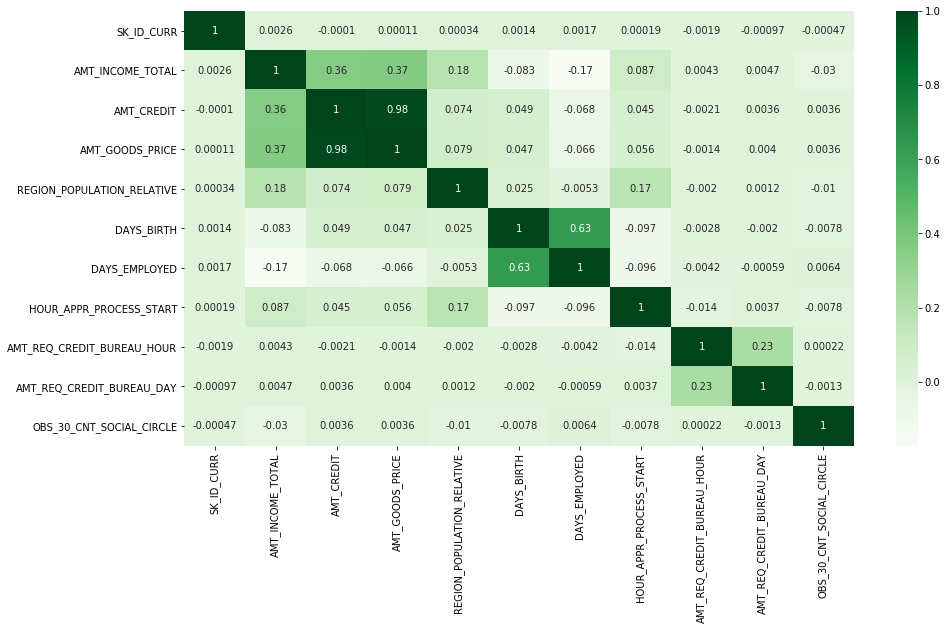

In [61]:
plt.figure(figsize=[15,8])
sns.heatmap(df_0.corr(),annot=True,cmap='Greens')

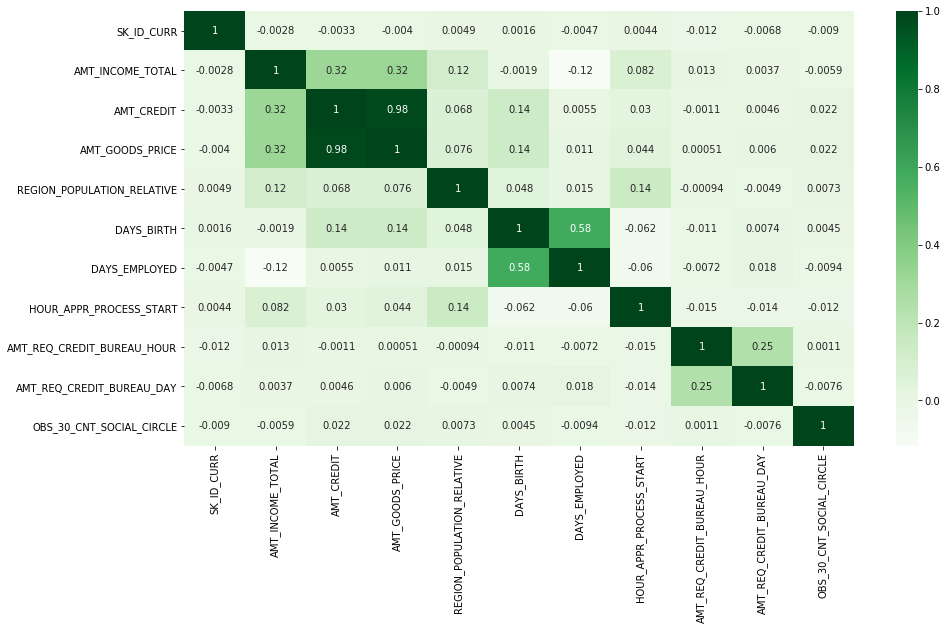

In [62]:
plt.figure(figsize=[15,8])
sns.heatmap(df_1.corr(),annot=True,cmap='Greens')

#### **TOP 10 CORRELATED VARIABLES FOR BOTH DEFAULT AND NON-DEFAULT**

In [63]:
corr = df_1.corr()
corr_df_1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df_1 = corr_df_1.unstack().reset_index().dropna(subset = [0])
corr_df_1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df_1['Corr_abs'] = abs(corr_df_1['Correlation_Value'])
corr_df_1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_1.iloc[0:10]

,VAR1,VAR2,Correlation_Value,Corr_abs
35,AMT_GOODS_PRICE,AMT_CREDIT,0.980285,0.980285
71,DAYS_EMPLOYED,DAYS_BIRTH,0.584187,0.584187
34,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.321918,0.321918
23,AMT_CREDIT,AMT_INCOME_TOTAL,0.319424,0.319424
107,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.245648,0.245648
81,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,0.142743,0.142743
58,DAYS_BIRTH,AMT_GOODS_PRICE,0.137776,0.137776
57,DAYS_BIRTH,AMT_CREDIT,0.137341,0.137341
67,DAYS_EMPLOYED,AMT_INCOME_TOTAL,-0.116068,0.116068
45,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.115591,0.115591


In [64]:
corr = df_0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index().dropna(subset = [0])
corr_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df['Corr_abs'] = abs(corr_df['Correlation_Value'])
corr_df.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df.iloc[0:10]

,VAR1,VAR2,Correlation_Value,Corr_abs
35,AMT_GOODS_PRICE,AMT_CREDIT,0.984433,0.984433
71,DAYS_EMPLOYED,DAYS_BIRTH,0.629560,0.629560
34,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.366950,0.366950
23,AMT_CREDIT,AMT_INCOME_TOTAL,0.360175,0.360175
107,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.234659,0.234659
45,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.183402,0.183402
67,DAYS_EMPLOYED,AMT_INCOME_TOTAL,-0.172291,0.172291
81,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,0.168041,0.168041
82,HOUR_APPR_PROCESS_START,DAYS_BIRTH,-0.096683,0.096683
83,HOUR_APPR_PROCESS_START,DAYS_EMPLOYED,-0.096144,0.096144


## **UNIVARIATE AND BIVARIATE**

Univariate:
    - Continuous Variable
    - Categorical Variable

Bivariate Anlysis:
    - Conti-Conti
    - Categorical-Categorical
    - Conti-Categorical


C:\Users\veins\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


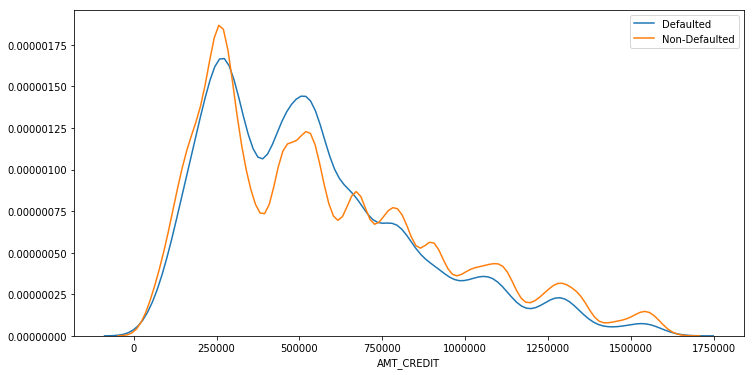

In [65]:
plt.figure(figsize=[12,6])
sns.distplot(df_1['AMT_CREDIT'], hist = False, label = 'Defaulted')
sns.distplot(df_0['AMT_CREDIT'], hist = False, label = 'Non-Defaulted')

**CONCLUSION** - From the above curve we can say that for Amount Credit both the curves are almost **normally distributed** for both Defaulted and Non-Defaulted targets.

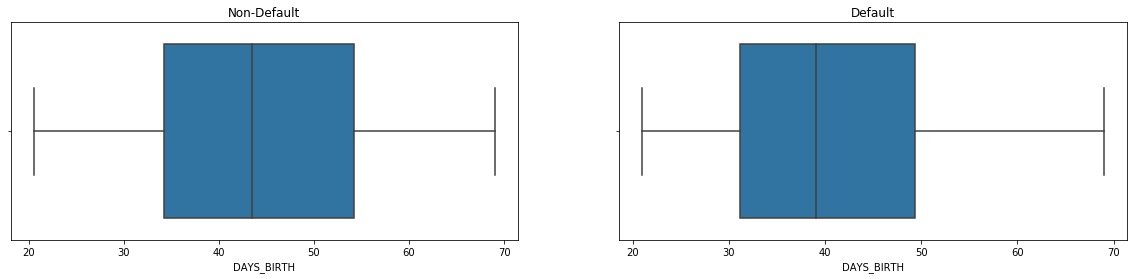

In [66]:
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title("Non-Default")
sns.boxplot(df_0.DAYS_BIRTH)
plt.subplot(1,2,2)
plt.title("Default")
sns.boxplot(df_1.DAYS_BIRTH)

**CONCUSION** - From the above analysis we can observe 2 points-
    1. Median(Non-Default)>Median(Default)
    2. People who are young tends to default more in comparison to people who are older.

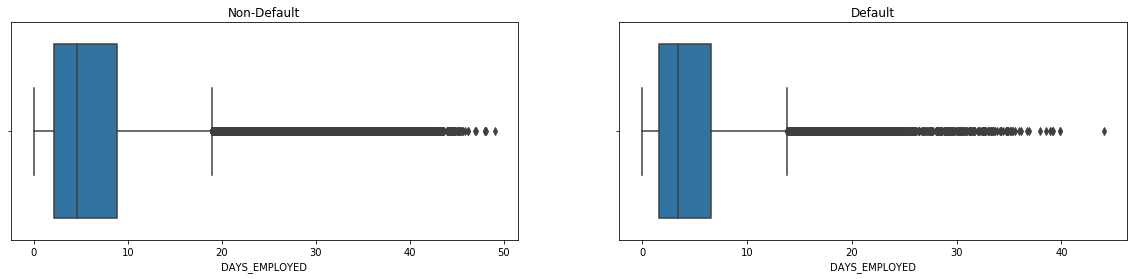

In [67]:
### analysing the days_employed column
### uni-continuous

plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
plt.title("Non-Default")
sns.boxplot(df_0[df_0.DAYS_EMPLOYED<60].DAYS_EMPLOYED)
plt.subplot(1,2,2)
plt.title("Default")
sns.boxplot(df_1[df_1.DAYS_EMPLOYED<60].DAYS_EMPLOYED)

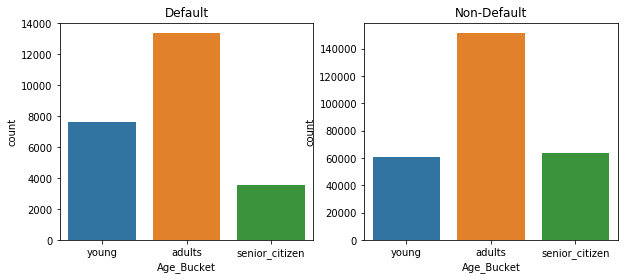

In [68]:
## Uni-Categorical

## analysis on the age bucket which was created
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(df_1['Age_Bucket'])


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.countplot(df_0['Age_Bucket'])

**CONCLUSION**
 - Young people(age between 20-33) Around 4000 young people tend to default.
 - Adults(age between 33-55) Most defaults are from this age group.
 -Senior (age between 55-75) Least defaults are from this age group.
 
 - **The above analysis shows that our target should be the age group between 33-55 as these people are most vulnerable candidates who can default maybe because they are already supporting their parents,children and maybe not settled yet and hence can be considered hot targets.**
 - **The senior citizen are less likely to default as maybe they have pensions and savings from their earnings.**

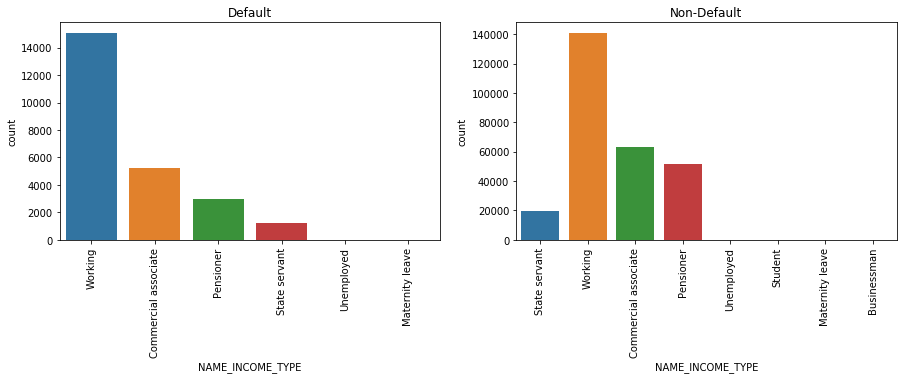

In [69]:
## Uni-Categorical

## analysis on the income bucket which was created
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['NAME_INCOME_TYPE'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['NAME_INCOME_TYPE'])

**CONCLUSION** - Most of the people defaulted belong to the Working class,whereas State servants are defaulted the least(As they have to keep clean records for their status)

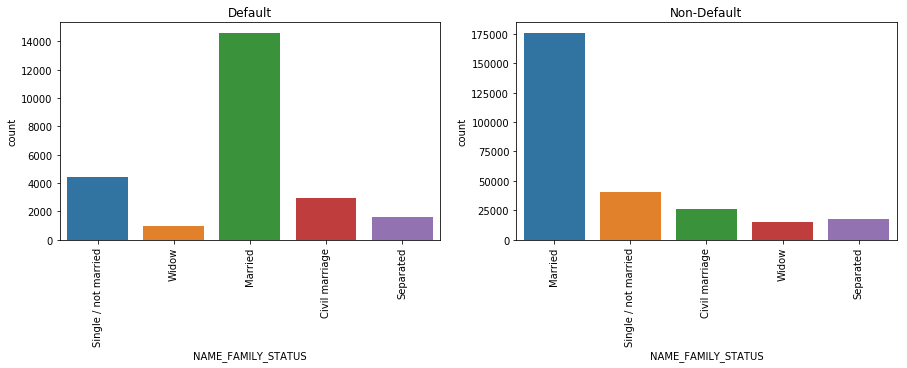

In [70]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['NAME_FAMILY_STATUS'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['NAME_FAMILY_STATUS'])

**CONCLUSION** - Married people are the highest in the default category wheras widowed are the lowest who are getting defaulted.

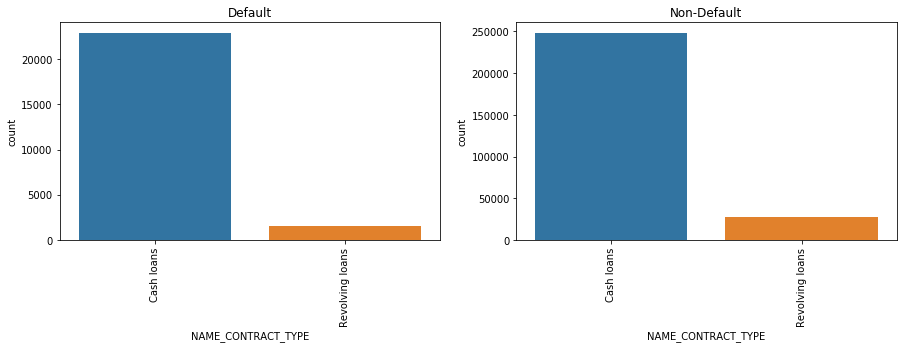

In [71]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['NAME_CONTRACT_TYPE'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['NAME_CONTRACT_TYPE'])

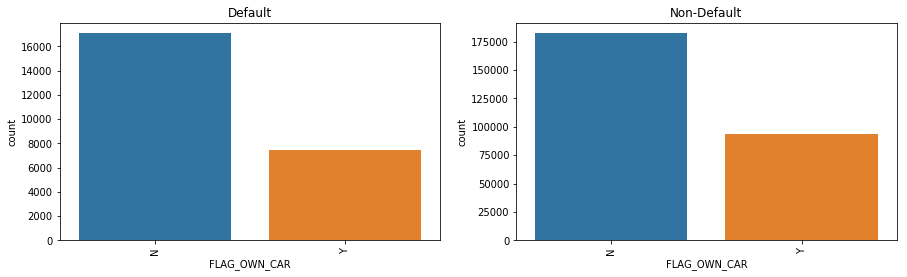

In [72]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['FLAG_OWN_CAR'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['FLAG_OWN_CAR'])

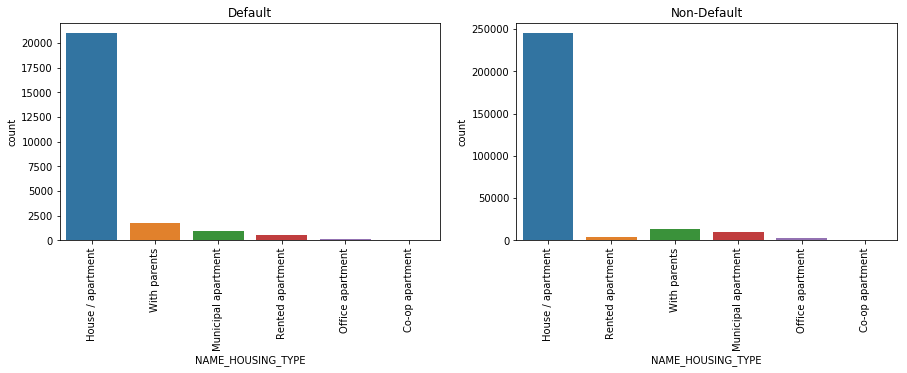

In [73]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Default")
sns.countplot(df_1['NAME_HOUSING_TYPE'])


plt.subplot(1,2,2)
plt.title("Non-Default")
plt.xticks(rotation=90)
sns.countplot(df_0['NAME_HOUSING_TYPE'])

## **BIVARIATE ANALYSIS**

#### **1.CONTI-CONTI ANALYSIS**

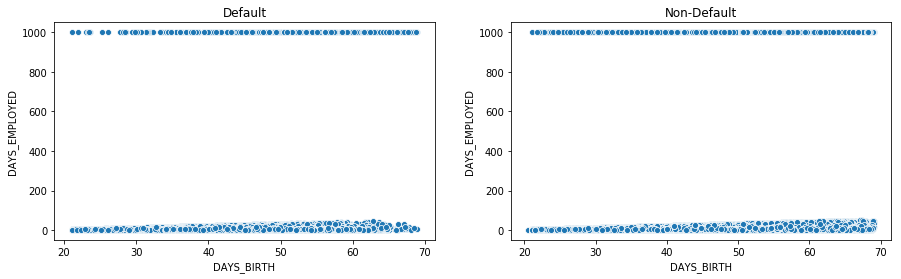

In [74]:
# Scatter

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(x='DAYS_BIRTH',y='DAYS_EMPLOYED',data=df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(df_0['DAYS_BIRTH'], df_0['DAYS_EMPLOYED'])

**CONCLUSION** -

C:\Users\veins\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


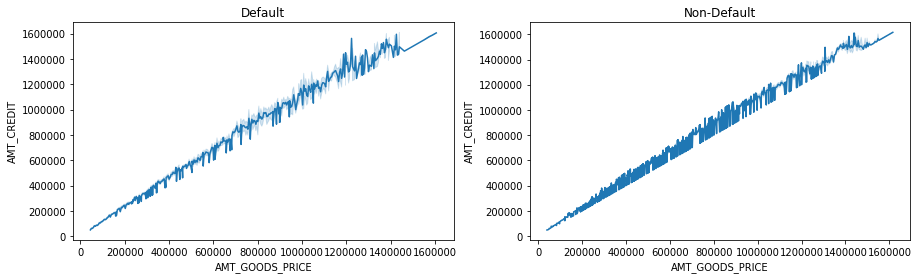

In [75]:
# Scatter

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.lineplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.lineplot(df_0['AMT_GOODS_PRICE'], df_0['AMT_CREDIT'])

**CONCLUSION** - From the above curve we can establish that there is a **linear relationship** between AMT_CREDIT AND AMT_GOODS_PRICE.

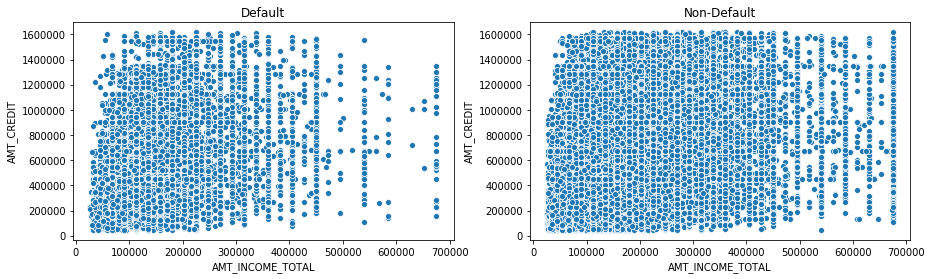

In [76]:
# Scatter

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',data=df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',data=df_0)

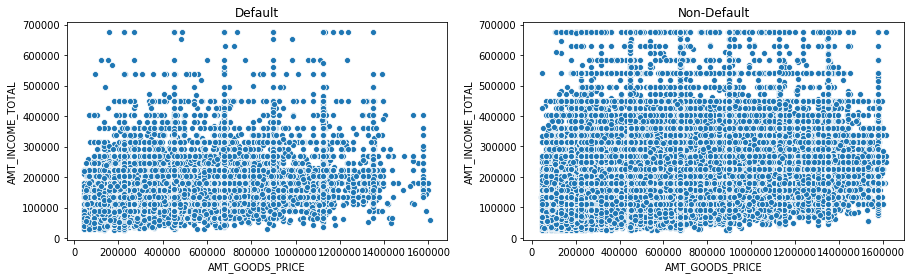

In [77]:
# Scatter

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_INCOME_TOTAL',data=df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_INCOME_TOTAL',data=df_0)

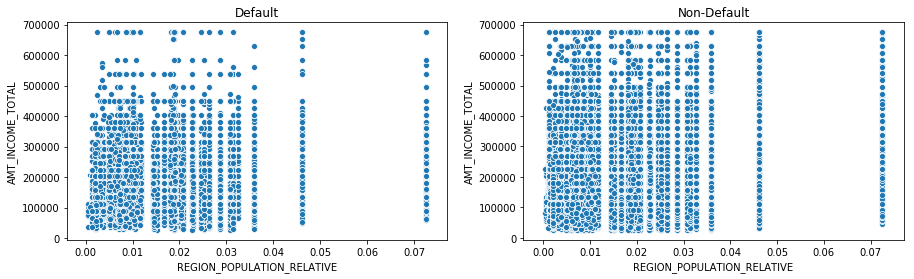

In [78]:

# Scatter

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(x='REGION_POPULATION_RELATIVE',y='AMT_INCOME_TOTAL',data=df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(x='REGION_POPULATION_RELATIVE',y='AMT_INCOME_TOTAL',data=df_0)

**CONCLUSION** - From the above curve we can establish that there is relationship between people defaulting,population density and income ie

**AS THE REGION_POPULATION_RELATIVE AND AMT_TOTAL_INCOME increases the no of defaults decreases hence it has a negative correlation**

#### **2.CONTI-CATEGORICAL ANALYSIS**

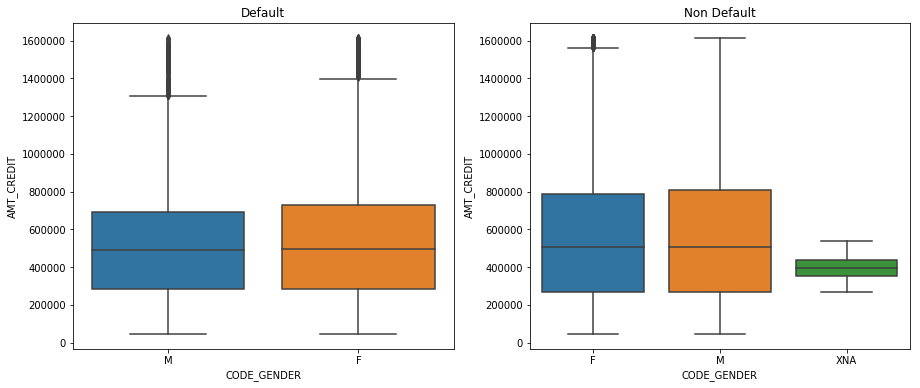

In [79]:
# Bivariate - Conti-Categorical
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(x = "CODE_GENDER", y = 'AMT_CREDIT', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.boxplot(x = "CODE_GENDER", y = 'AMT_CREDIT', data = df_0)

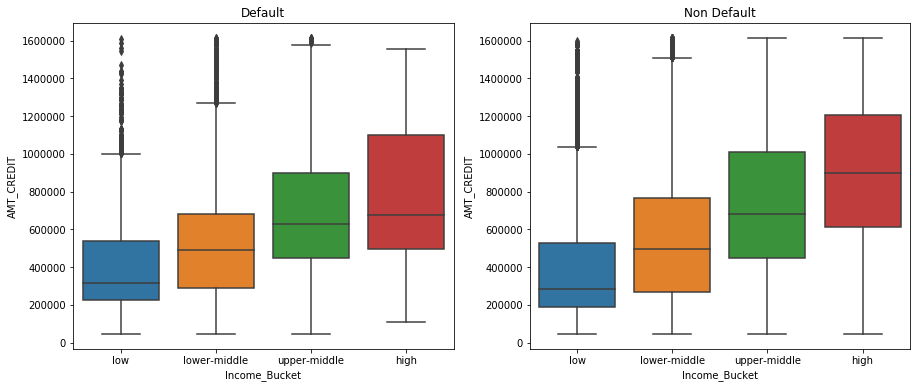

In [80]:
# Bivariate - Conti-Categorical
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(x = "Income_Bucket", y = 'AMT_CREDIT', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.boxplot(x = "Income_Bucket", y = 'AMT_CREDIT', data = df_0)

**CONCLUSION**-As the value of Income increases the value of Amount CREDIT also increases thus giving us the above insight.

#### **3.CATEGORICAL-CATEGORICAL ANALYSIS**

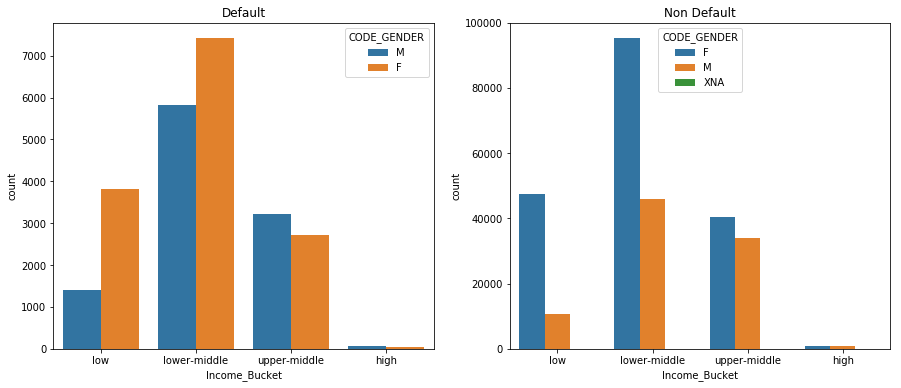

In [81]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = "Income_Bucket", hue = 'CODE_GENDER', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.countplot(x = "Income_Bucket", hue = 'CODE_GENDER', data = df_0)

**CONCLUSION** -

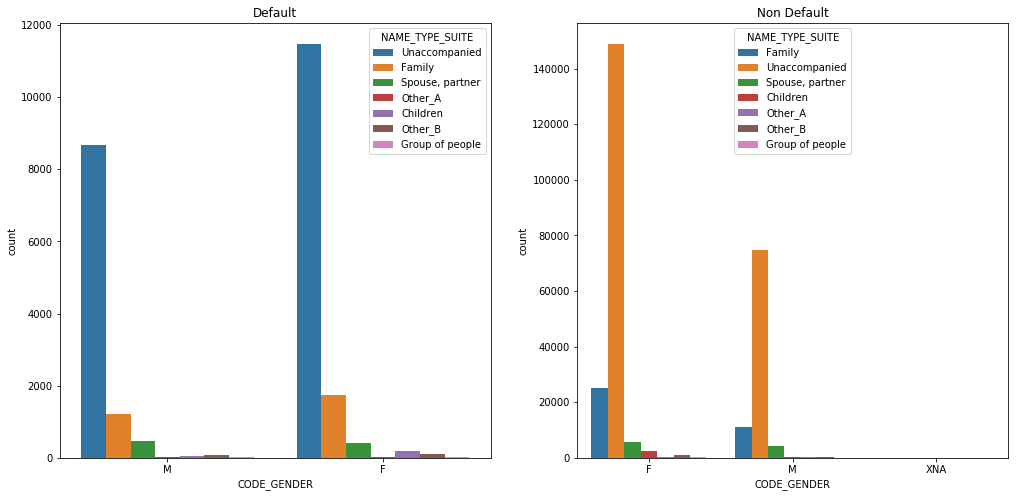

In [82]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (17, 8))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = "CODE_GENDER", hue = 'NAME_TYPE_SUITE', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.countplot(x = "CODE_GENDER", hue = 'NAME_TYPE_SUITE', data = df_0)

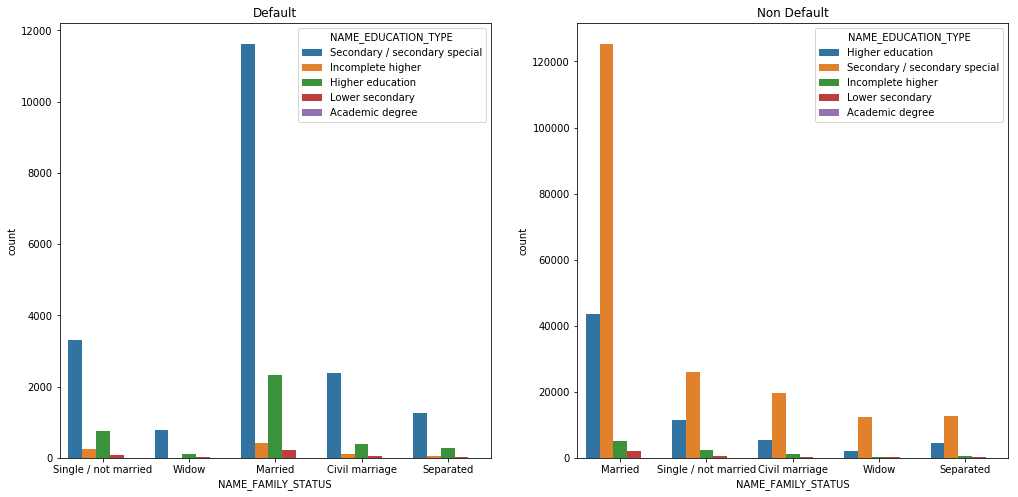

In [83]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (17, 8))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = "NAME_FAMILY_STATUS", hue = 'NAME_EDUCATION_TYPE', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.countplot(x = "NAME_FAMILY_STATUS", hue = 'NAME_EDUCATION_TYPE', data = df_0)

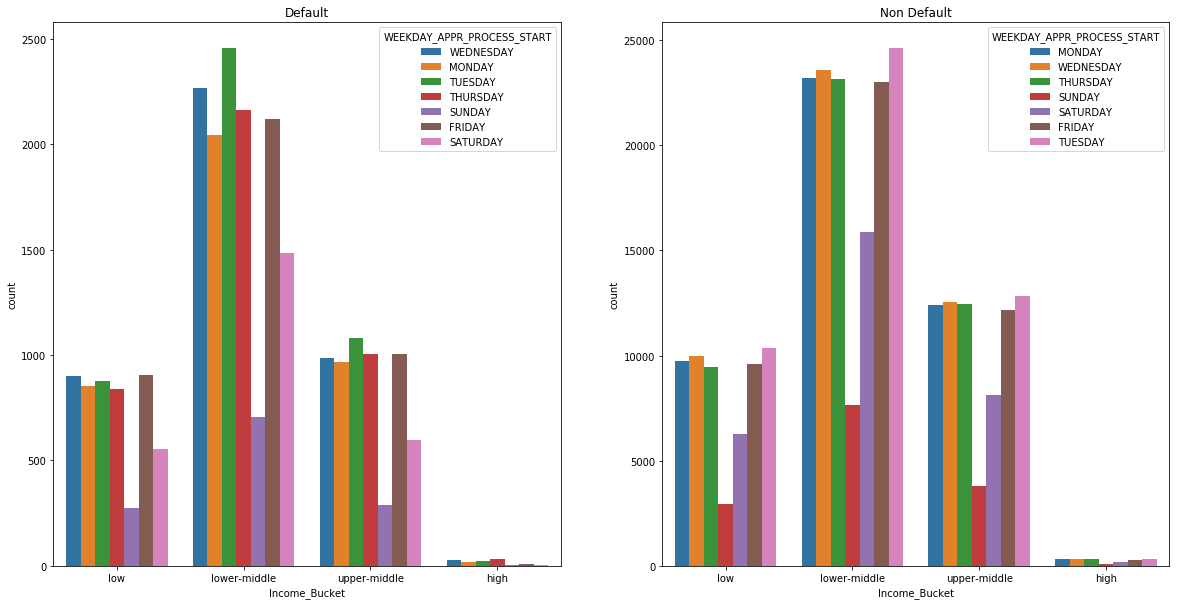

In [84]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = "Income_Bucket", hue = 'WEEKDAY_APPR_PROCESS_START', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.countplot(x = "Income_Bucket", hue = 'WEEKDAY_APPR_PROCESS_START', data = df_0)

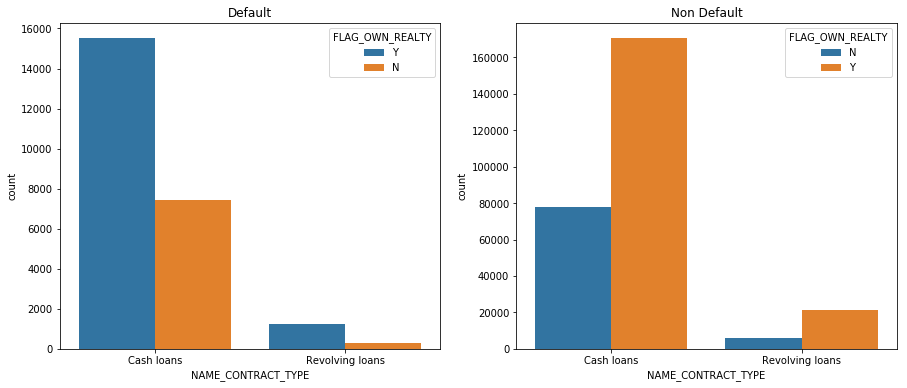

In [85]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = 'FLAG_OWN_REALTY', data = df_1)


plt.subplot(1,2,2)
plt.title("Non Default")
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = 'FLAG_OWN_REALTY', data = df_0)

# **EXPLORING PREVIOUS APP DATASET**

## **PART-1 CLEANING AND ANALYSIS OF DATA**

In [86]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
1,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
2,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
3,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
4,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300087 entries, 0 to 307510
Data columns (total 31 columns):
SK_ID_CURR                     300087 non-null int64
TARGET                         300087 non-null object
NAME_CONTRACT_TYPE             300087 non-null object
CODE_GENDER                    300087 non-null object
FLAG_OWN_CAR                   300087 non-null object
FLAG_OWN_REALTY                300087 non-null object
CNT_CHILDREN                   300087 non-null object
AMT_INCOME_TOTAL               300087 non-null float64
AMT_CREDIT                     300087 non-null float64
AMT_GOODS_PRICE                300087 non-null float64
NAME_TYPE_SUITE                300087 non-null object
NAME_INCOME_TYPE               300087 non-null object
NAME_EDUCATION_TYPE            300087 non-null object
NAME_FAMILY_STATUS             300087 non-null object
NAME_HOUSING_TYPE              300087 non-null object
REGION_POPULATION_RELATIVE     300087 non-null float64
DAYS_BIRTH            

In [88]:
x=100*df_prev.isnull().sum()/df_prev.shape[0]
x

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.250911
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               53.637935
AMT_GOODS_PRICE                23.041080
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.637935
RATE_INTEREST_PRIMARY          99.643908
RATE_INTEREST_PRIVILEGED       99.643908
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.123689
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [89]:
### DROPPING columns which have null values more than 40%
columns_incl=x[x<40].index
columns_incl

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [90]:
df_prev1=df_prev.loc[:,columns_incl]
df_prev1.shape

(668085, 26)

### **MERGING THE 2 DATASETS**

In [91]:
df_prev1.SK_ID_CURR.value_counts().head()

265681    36
238250    31
242412    30
382179    30
173680    29
Name: SK_ID_CURR, dtype: int64

In [92]:
df_merge2=pd.merge(df_prev1,df,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='inner')
df_merge2.shape

(554780, 56)

In [93]:
100*df_merge2.isnull().sum()/df_merge2.shape[0]

SK_ID_PREV                       0.000000
SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE_x             0.000000
AMT_ANNUITY                     21.738887
AMT_APPLICATION                  0.000000
AMT_CREDIT_x                     0.000000
AMT_GOODS_PRICE_x               22.601211
WEEKDAY_APPR_PROCESS_START_x     0.000000
HOUR_APPR_PROCESS_START_x        0.000000
FLAG_LAST_APPL_PER_CONTRACT      0.000000
NFLAG_LAST_APPL_IN_DAY           0.000000
NAME_CASH_LOAN_PURPOSE           0.000000
NAME_CONTRACT_STATUS             0.000000
DAYS_DECISION                    0.000000
NAME_PAYMENT_TYPE                0.000000
CODE_REJECT_REASON               0.000000
NAME_CLIENT_TYPE                 0.000000
NAME_GOODS_CATEGORY              0.000000
NAME_PORTFOLIO                   0.000000
NAME_PRODUCT_TYPE                0.000000
CHANNEL_TYPE                     0.000000
SELLERPLACE_AREA                 0.000000
NAME_SELLER_INDUSTRY             0.000000
CNT_PAYMENT                     21

### **METRICS TO SUBSTITUTE FOR THE MISSING VALUES**

In [94]:
df_missing=df_merge2[['AMT_ANNUITY','AMT_GOODS_PRICE_x','CNT_PAYMENT']]
df_missing.describe()

,AMT_ANNUITY,AMT_GOODS_PRICE_x,CNT_PAYMENT
count,434177.000000,4.293930e+05,434180.000000
mean,15669.710317,2.229882e+05,16.004171
std,14432.560996,3.089166e+05,14.496359
min,0.000000,0.000000e+00,0.000000
25%,6226.065000,4.950000e+04,6.000000
50%,11146.095000,1.091880e+05,12.000000
75%,20250.000000,2.295000e+05,24.000000
max,418058.145000,4.455000e+06,84.000000


#### **METRIC TO SUBSTITUTE FOR 3 NUMERIC COLUMNS**

- **AMT_ANNUITY** - Since outliers are present we will take **median** as the metric and hence substitute 11142.810000 for missing values.
- **AMT_GOODS_PRICE_x** - Since outliers are present we will take **median** as the metric and hence substitute 108886.5 for missing values.
- **CNT_PAYMENT** - Since large outliers are not present we will take **mean** as the metric and hence substitute 16.01 for missing values.


In [95]:
df_merge2['AMT_ANNUITY'].median()

11146.095

In [96]:
df_merge2['AMT_ANNUITY']=df_merge2['AMT_ANNUITY'].fillna(df_merge2['AMT_ANNUITY'].median())
df_merge2['AMT_GOODS_PRICE_x']=df_merge2['AMT_GOODS_PRICE_x'].fillna(df_merge2['AMT_GOODS_PRICE_x'].median())
df_merge2['CNT_PAYMENT']=df_merge2['CNT_PAYMENT'].fillna(df_merge2['CNT_PAYMENT'].median())

In [97]:
## lets remove the missing values from PRODUCT_COMBINATION as they are less than 0.5%
df_merge2=df_merge2[~df_merge2['PRODUCT_COMBINATION'].isnull()]

#### CONVERTING AGE TO YEARS FOR DAYS_DECISION

In [98]:
df_merge2['DAYS_DECISION'] = abs(df_merge2['DAYS_DECISION'])/365
df_merge2['DAYS_DECISION'].describe()

count    554660.000000
mean          2.406641
std           2.144079
min           0.005479
25%           0.739726
50%           1.589041
75%           3.589041
max           8.005479
Name: DAYS_DECISION, dtype: float64

In [99]:
df_merge2.CHANNEL_TYPE.value_counts()

Credit and cash offices       235794
Country-wide                  165728
Stone                          72116
Regional / Local               36315
Contact center                 22957
AP+ (Cash loan)                19588
Channel of corporate sales      2009
Car dealer                       153
Name: CHANNEL_TYPE, dtype: int64

**Note**- in this case our important variable is "NAME_CONTRACT_STATUS"

In [100]:
df_merge2.isnull().sum()

SK_ID_PREV                      0
SK_ID_CURR                      0
NAME_CONTRACT_TYPE_x            0
AMT_ANNUITY                     0
AMT_APPLICATION                 0
AMT_CREDIT_x                    0
AMT_GOODS_PRICE_x               0
WEEKDAY_APPR_PROCESS_START_x    0
HOUR_APPR_PROCESS_START_x       0
FLAG_LAST_APPL_PER_CONTRACT     0
NFLAG_LAST_APPL_IN_DAY          0
NAME_CASH_LOAN_PURPOSE          0
NAME_CONTRACT_STATUS            0
DAYS_DECISION                   0
NAME_PAYMENT_TYPE               0
CODE_REJECT_REASON              0
NAME_CLIENT_TYPE                0
NAME_GOODS_CATEGORY             0
NAME_PORTFOLIO                  0
NAME_PRODUCT_TYPE               0
CHANNEL_TYPE                    0
SELLERPLACE_AREA                0
NAME_SELLER_INDUSTRY            0
CNT_PAYMENT                     0
NAME_YIELD_GROUP                0
PRODUCT_COMBINATION             0
TARGET                          0
NAME_CONTRACT_TYPE_y            0
CODE_GENDER                     0
FLAG_OWN_CAR  

#### **REMOVING THE OUTLIERS**

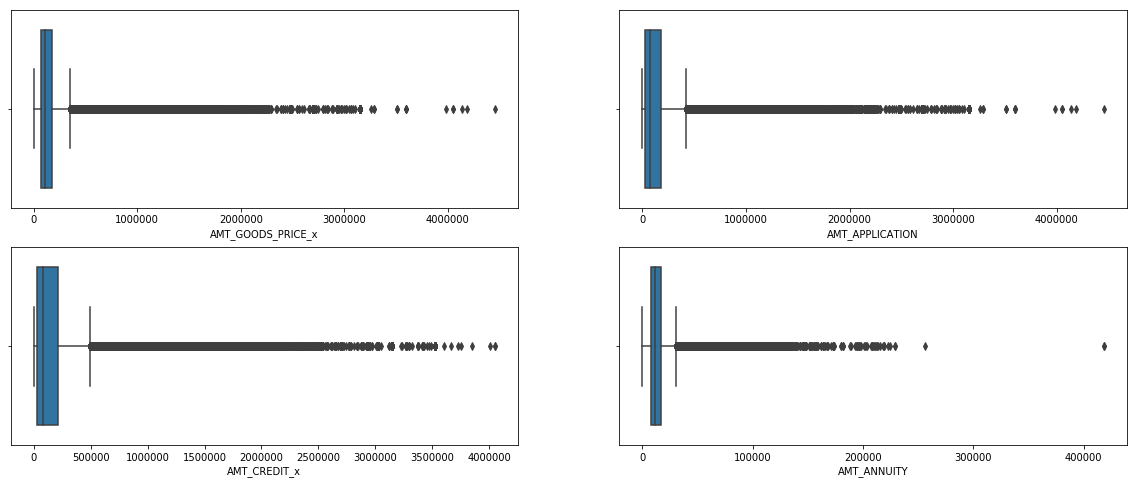

In [101]:
plt.figure(figsize=[20,8])
plt.subplot(2,2,1)
sns.boxplot(df_merge2.AMT_GOODS_PRICE_x)
plt.subplot(2,2,2)
sns.boxplot(df_merge2.AMT_APPLICATION)
plt.subplot(2,2,3)
sns.boxplot(df_merge2.AMT_CREDIT_x)
plt.subplot(2,2,4)
sns.boxplot(df_merge2.AMT_ANNUITY)

In [102]:
def calc_iqr(x):
    Q1 = df_merge2[x].quantile(0.25)
    Q3 = df_merge2[x].quantile(0.75)
    IQR = Q3 - Q1
    return Q3+1.5*IQR
len(df_merge2.AMT_GOODS_PRICE_x[(df_merge2.AMT_GOODS_PRICE_x > 2*calc_iqr('AMT_GOODS_PRICE_x'))])

30775

In [103]:
## dropping the outliers for easier analyis
df_merge2=df_merge2[df_merge2.AMT_GOODS_PRICE_x<2*calc_iqr('AMT_GOODS_PRICE_x')]

In [104]:
df_merge2.shape

(523885, 56)

In [130]:
df_merge2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE,Hourly_Bucket,Age_Bucket,Income_Bucket
0,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,0.824658,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,No,Cash loans,F,N,Y,3,40500.0,284400.0,225000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.025164,28.879452,3.224658,Core staff,5.0,2,2,TUESDAY,9,Postal,0.0,0.0,4.0,morning,young,low
1,1373144,122040,Revolving loans,6300.000,95715.0,90000.0,95715.0,FRIDAY,10,Y,1,XAP,Approved,6.589041,XNA,XAP,Repeater,Consumer Electronics,Cards,x-sell,Stone,104,Consumer electronics,0.0,XNA,Card Street,No,Cash loans,F,N,Y,3,40500.0,284400.0,225000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.025164,28.879452,3.224658,Core staff,5.0,2,2,TUESDAY,9,Postal,0.0,0.0,4.0,morning,young,low
2,1200676,122040,Cash loans,11146.095,0.0,0.0,109188.0,TUESDAY,11,Y,1,XNA,Canceled,0.824658,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash,No,Cash loans,F,N,Y,3,40500.0,284400.0,225000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.025164,28.879452,3.224658,Core staff,5.0,2,2,TUESDAY,9,Postal,0.0,0.0,4.0,morning,young,low
3,2315218,175704,Cash loans,11146.095,0.0,0.0,109188.0,TUESDAY,11,Y,1,XNA,Canceled,0.038356,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash,No,Cash loans,F,N,Y,0,112500.0,112500.0,112500.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.025164,58.912329,1000.665753,Retired,2.0,2,2,TUESDAY,9,XNA,0.0,0.0,18.0,morning,senior_citizen,lower-middle
4,2367563,342292,Cash loans,11146.095,0.0,0.0,109188.0,MONDAY,15,Y,1,XNA,Canceled,1.057534,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash,No,Cash loans,F,N,N,0,157500.0,495351.0,459000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,50.235616,5.035616,Sales staff,2.0,2,2,TUESDAY,13,Self-employed,0.0,0.0,1.0,afternoon,adults,lower-middle


## **PART 2.CORRELATION AND TOP 10 VARIABLES**

In [105]:
### taking first 30 columns for analysis and dropping the first 2 columns as they are id's
df_merge3=df_merge2.iloc[:,np.r_[2:32,48:56]]
df_merge3.head()

,NAME_CONTRACT_TYPE_x,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,OBS_30_CNT_SOCIAL_CIRCLE,Hourly_Bucket,Age_Bucket,Income_Bucket
0,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,0.824658,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,No,Cash loans,F,N,Y,3,4.0,morning,young,low
1,Revolving loans,6300.000,95715.0,90000.0,95715.0,FRIDAY,10,Y,1,XAP,Approved,6.589041,XNA,XAP,Repeater,Consumer Electronics,Cards,x-sell,Stone,104,Consumer electronics,0.0,XNA,Card Street,No,Cash loans,F,N,Y,3,4.0,morning,young,low
2,Cash loans,11146.095,0.0,0.0,109188.0,TUESDAY,11,Y,1,XNA,Canceled,0.824658,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash,No,Cash loans,F,N,Y,3,4.0,morning,young,low
3,Cash loans,11146.095,0.0,0.0,109188.0,TUESDAY,11,Y,1,XNA,Canceled,0.038356,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash,No,Cash loans,F,N,Y,0,18.0,morning,senior_citizen,lower-middle
4,Cash loans,11146.095,0.0,0.0,109188.0,MONDAY,15,Y,1,XNA,Canceled,1.057534,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash,No,Cash loans,F,N,N,0,1.0,afternoon,adults,lower-middle


In [106]:
df_merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523885 entries, 0 to 554779
Data columns (total 34 columns):
NAME_CONTRACT_TYPE_x            523885 non-null object
AMT_ANNUITY                     523885 non-null float64
AMT_APPLICATION                 523885 non-null float64
AMT_CREDIT_x                    523885 non-null float64
AMT_GOODS_PRICE_x               523885 non-null float64
WEEKDAY_APPR_PROCESS_START_x    523885 non-null object
HOUR_APPR_PROCESS_START_x       523885 non-null int64
FLAG_LAST_APPL_PER_CONTRACT     523885 non-null object
NFLAG_LAST_APPL_IN_DAY          523885 non-null int64
NAME_CASH_LOAN_PURPOSE          523885 non-null object
NAME_CONTRACT_STATUS            523885 non-null object
DAYS_DECISION                   523885 non-null float64
NAME_PAYMENT_TYPE               523885 non-null object
CODE_REJECT_REASON              523885 non-null object
NAME_CLIENT_TYPE                523885 non-null object
NAME_GOODS_CATEGORY             523885 non-null object
NAME_P

In [107]:
df_merge3.NAME_CONTRACT_STATUS.value_counts()

Approved        331655
Canceled        100580
Refused          82735
Unused offer      8915
Name: NAME_CONTRACT_STATUS, dtype: int64

#### **SPLITTING THE DATASETS INTO 3 PARTS ON THE BASIS OF CONTRACT_STATUS**

In [108]:
df_appr=df_merge3[df_merge3.NAME_CONTRACT_STATUS=='Approved']
df_canc=df_merge3[df_merge3.NAME_CONTRACT_STATUS=='Canceled']
df_refu=df_merge3[df_merge3.NAME_CONTRACT_STATUS=='Refused']

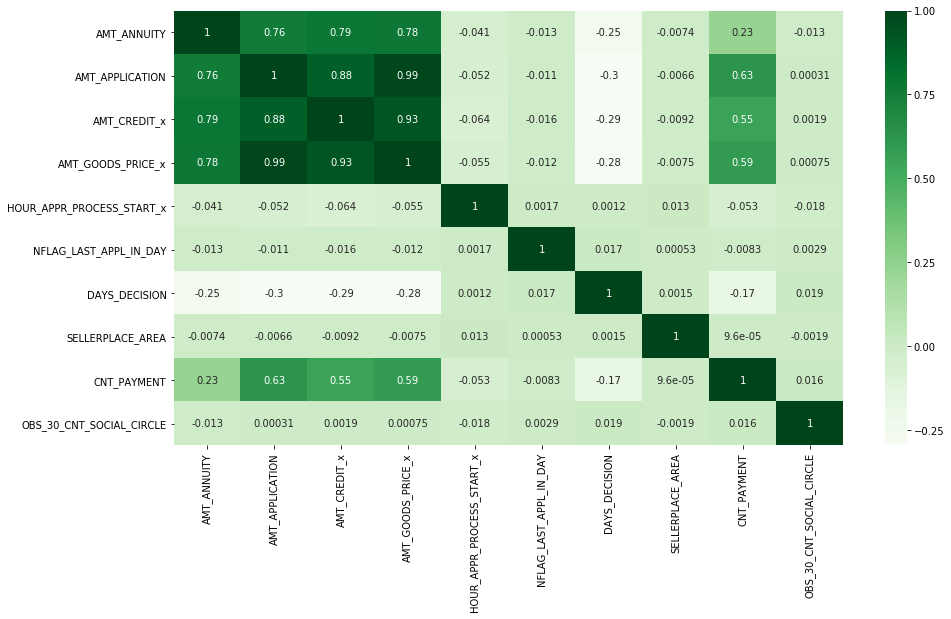

In [109]:
plt.figure(figsize=[15,8])
sns.heatmap(df_appr.corr(),annot=True,cmap='Greens')

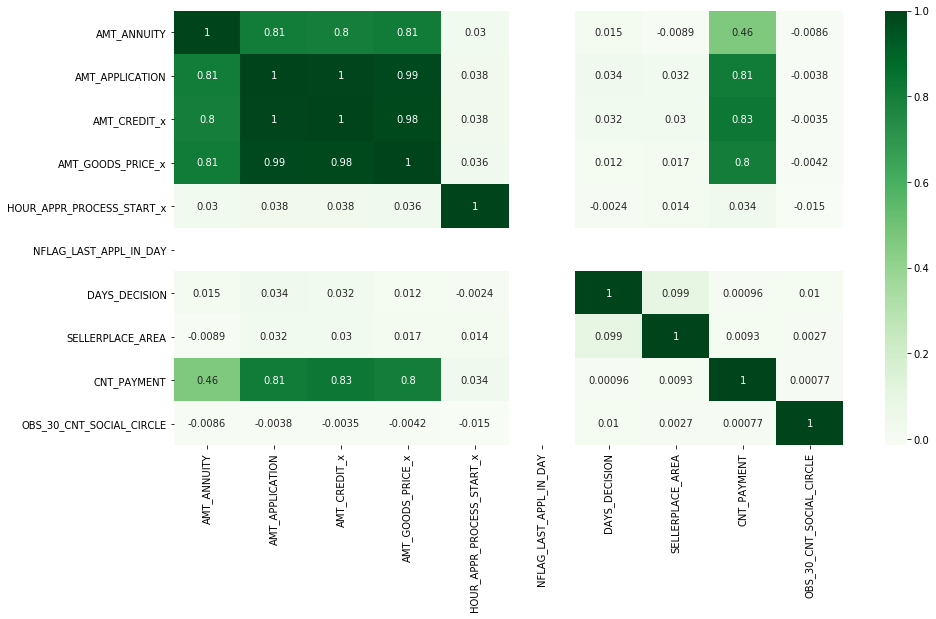

In [110]:
plt.figure(figsize=[15,8])
sns.heatmap(df_canc.corr(),annot=True,cmap='Greens')

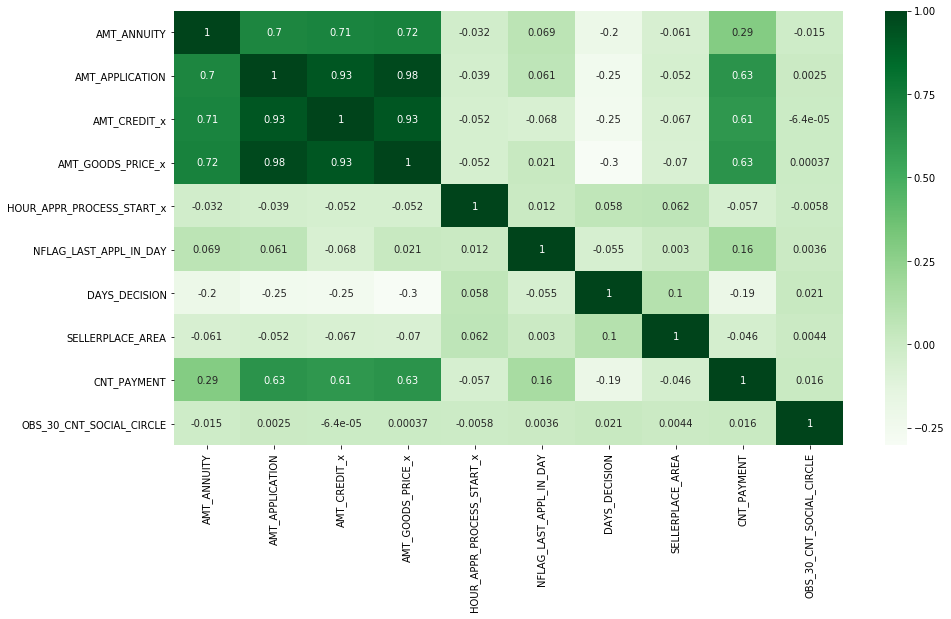

In [111]:
plt.figure(figsize=[15,8])
sns.heatmap(df_refu.corr(),annot=True,cmap='Greens')

#### **GETTING THE TOP 10 CORRELATED VARIABLES**

In [112]:
corr = df_appr.corr()
corr_df_1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df_1 = corr_df_1.unstack().reset_index().dropna(subset = [0])
corr_df_1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df_1['Corr_abs'] = abs(corr_df_1['Correlation_Value'])
corr_df_1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_1.iloc[0:10]

,VAR1,VAR2,Correlation_Value,Corr_abs
31,AMT_GOODS_PRICE_x,AMT_APPLICATION,0.986749,0.986749
32,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.929484,0.929484
21,AMT_CREDIT_x,AMT_APPLICATION,0.884946,0.884946
20,AMT_CREDIT_x,AMT_ANNUITY,0.785663,0.785663
30,AMT_GOODS_PRICE_x,AMT_ANNUITY,0.777303,0.777303
10,AMT_APPLICATION,AMT_ANNUITY,0.758376,0.758376
81,CNT_PAYMENT,AMT_APPLICATION,0.626636,0.626636
83,CNT_PAYMENT,AMT_GOODS_PRICE_x,0.595000,0.595000
82,CNT_PAYMENT,AMT_CREDIT_x,0.552565,0.552565
61,DAYS_DECISION,AMT_APPLICATION,-0.295594,0.295594


In [113]:
corr = df_refu.corr()
corr_df_1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df_1 = corr_df_1.unstack().reset_index().dropna(subset = [0])
corr_df_1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df_1['Corr_abs'] = abs(corr_df_1['Correlation_Value'])
corr_df_1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_1.iloc[0:10]

,VAR1,VAR2,Correlation_Value,Corr_abs
31,AMT_GOODS_PRICE_x,AMT_APPLICATION,0.977967,0.977967
32,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.928210,0.928210
21,AMT_CREDIT_x,AMT_APPLICATION,0.925940,0.925940
30,AMT_GOODS_PRICE_x,AMT_ANNUITY,0.721542,0.721542
20,AMT_CREDIT_x,AMT_ANNUITY,0.714968,0.714968
10,AMT_APPLICATION,AMT_ANNUITY,0.700024,0.700024
81,CNT_PAYMENT,AMT_APPLICATION,0.633185,0.633185
83,CNT_PAYMENT,AMT_GOODS_PRICE_x,0.629707,0.629707
82,CNT_PAYMENT,AMT_CREDIT_x,0.613167,0.613167
63,DAYS_DECISION,AMT_GOODS_PRICE_x,-0.302947,0.302947


#### **CONCLUSION** - The highest correlated values to target are 
AMT_GOODS_PRICE_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_ANNUITY,CNT_PAYMENT,DAYS_DECISION

## **PART 3.UNIVARIATE AND BIVARIATE ANALYSIS ON MERGED DATA**

### **1.UNIVAR-CONTINUOUS**

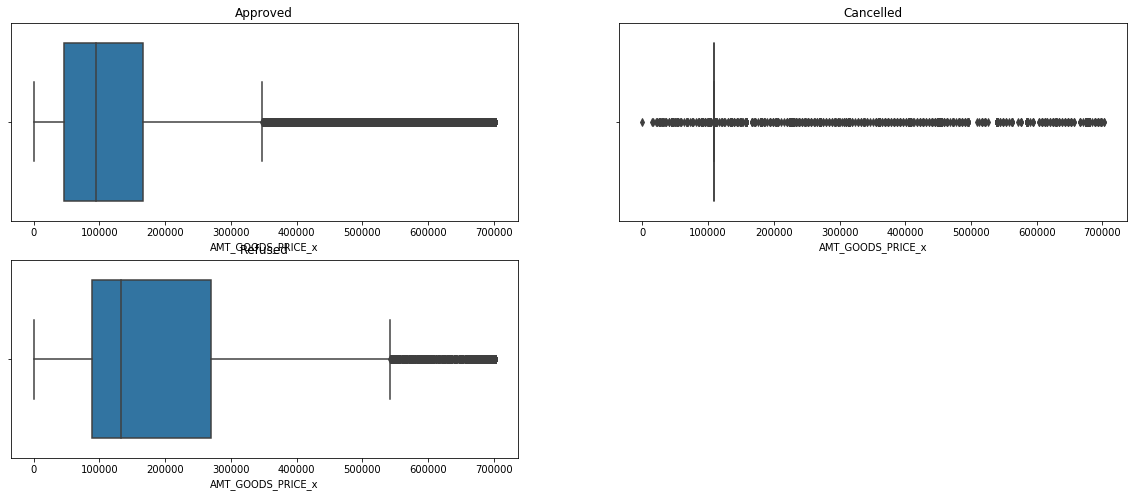

In [114]:
plt.figure(figsize=[20,8])
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(df_appr.AMT_GOODS_PRICE_x)
plt.subplot(2,2,2)
plt.title("Cancelled")
sns.boxplot(df_canc.AMT_GOODS_PRICE_x)
plt.subplot(2,2,3)
plt.title("Refused")
sns.boxplot(df_refu.AMT_GOODS_PRICE_x)

**CONCLUSION** - The above graph concludes that the probablity of approving a loan is higher if the AMT_GOODS_PRICE is below 200000.

C:\Users\veins\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


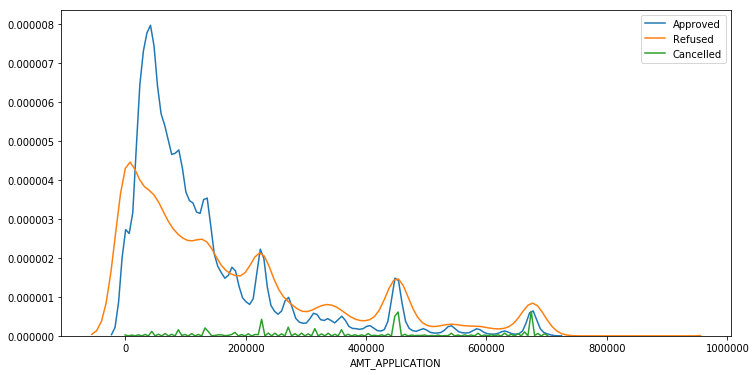

In [115]:
plt.figure(figsize=[12,6])
sns.distplot(df_appr.AMT_APPLICATION, hist = False, label = 'Approved')
sns.distplot(df_refu.AMT_APPLICATION, hist = False, label = 'Refused')
sns.distplot(df_canc.AMT_APPLICATION, hist = False, label = 'Cancelled')

**CONCLUSION** - A trend that can be seen from above curve is that if the AMT_APPLICATION is lower then the chances of getting a previous loan approved is higher.

C:\Users\veins\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


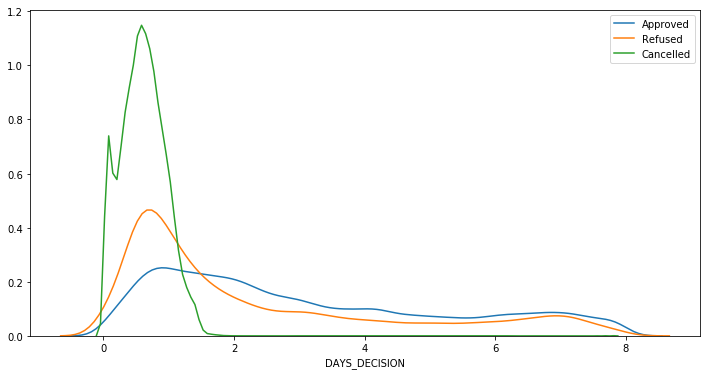

In [116]:

plt.figure(figsize=[12,6])
sns.distplot(df_appr.DAYS_DECISION, hist = False, label = 'Approved')
sns.distplot(df_refu.DAYS_DECISION, hist = False, label = 'Refused')
sns.distplot(df_canc.DAYS_DECISION, hist = False, label = 'Cancelled')

**CONCLUSION** - If the previous application decision days is lower then the chances of the application getting cancelled is higher.

### **2.UNIVAR-CATEGORICAL**

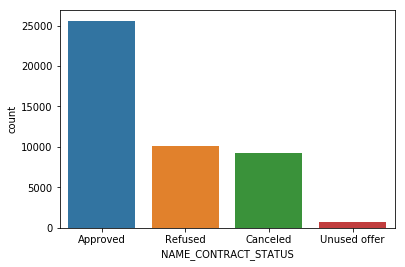

In [117]:
x=df_merge3[df_merge3.TARGET=='Yes']
sns.countplot(x['NAME_CONTRACT_STATUS'])

**CONCLUSION** - One observation to notice is that most of the people who have defaulted had gotten their loan previous loans approved.

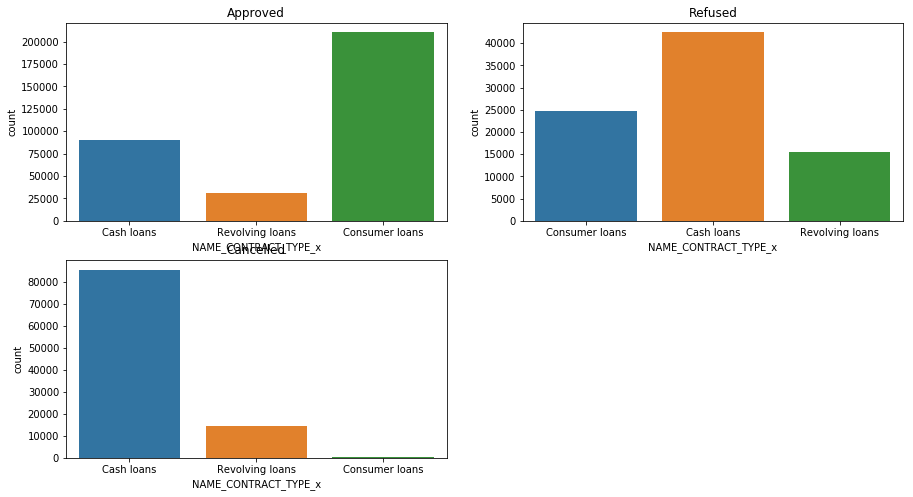

In [118]:
plt.figure(figsize = (15, 8))
plt.subplot(2,2,1)
plt.title("Approved")
sns.countplot(df_appr['NAME_CONTRACT_TYPE_x'])


plt.subplot(2,2,2)
plt.title("Refused")
sns.countplot(df_refu['NAME_CONTRACT_TYPE_x'])

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.countplot(df_canc['NAME_CONTRACT_TYPE_x'])

**CONCLUSION** - From the above metric we can see that mostly **Consumer Loans are approved** and **Cash Loans are rejected** .

In [119]:
df_appr.head()

,NAME_CONTRACT_TYPE_x,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,OBS_30_CNT_SOCIAL_CIRCLE,Hourly_Bucket,Age_Bucket,Income_Bucket
0,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,0.824658,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,No,Cash loans,F,N,Y,3,4.0,morning,young,low
1,Revolving loans,6300.000,95715.0,90000.0,95715.0,FRIDAY,10,Y,1,XAP,Approved,6.589041,XNA,XAP,Repeater,Consumer Electronics,Cards,x-sell,Stone,104,Consumer electronics,0.0,XNA,Card Street,No,Cash loans,F,N,Y,3,4.0,morning,young,low
5,Cash loans,21959.865,360000.0,393264.0,360000.0,SATURDAY,10,Y,1,XNA,Approved,0.890411,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,low_normal,Cash X-Sell: low,No,Cash loans,F,N,N,0,1.0,afternoon,adults,lower-middle
7,Consumer loans,2905.470,17185.5,18319.5,17185.5,MONDAY,15,Y,1,XAP,Approved,6.945205,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Stone,12,Connectivity,8.0,high,POS mobile with interest,No,Cash loans,F,N,N,0,1.0,afternoon,adults,lower-middle
8,Consumer loans,11840.040,72405.0,77184.0,72405.0,THURSDAY,11,Y,1,XAP,Approved,3.964384,Cash through the bank,XAP,Repeater,Photo / Cinema Equipment,POS,XNA,Country-wide,4599,Consumer electronics,8.0,high,POS household with interest,No,Cash loans,F,N,N,0,1.0,afternoon,adults,lower-middle


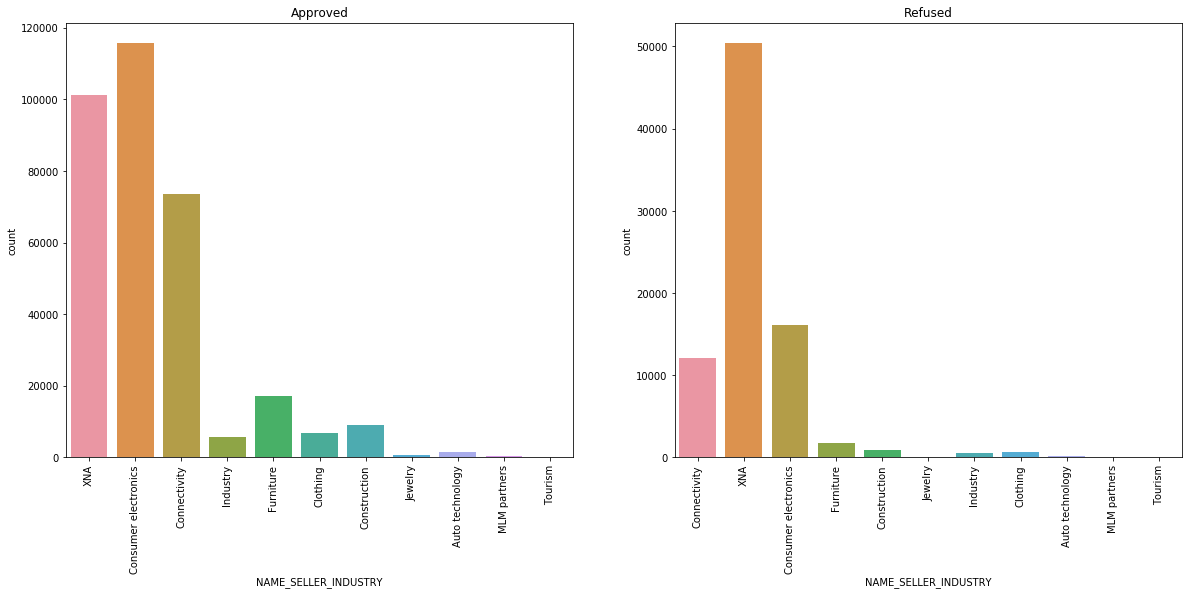

In [120]:
plt.figure(figsize = (20, 8))
plt.subplot(1,2,1)
plt.title("Approved")
plt.xticks(rotation=90)
sns.countplot(df_appr['NAME_SELLER_INDUSTRY'])


plt.subplot(1,2,2)
plt.title("Refused")
plt.xticks(rotation=90)
sns.countplot(df_refu['NAME_SELLER_INDUSTRY'])


**CONCLUSION** -Most of the loans approved belongs to the data where Selling industry is **Consumer Electronics**.

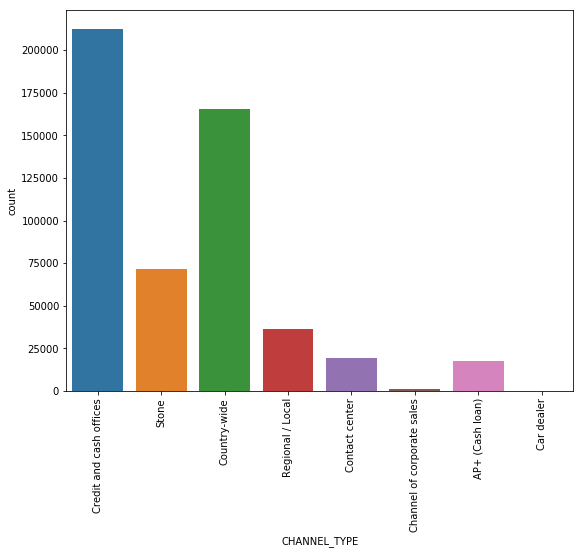

In [139]:
plt.figure(figsize = (20, 7))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot(df_merge3['CHANNEL_TYPE'])

**CONCLUSION** -Top channels through which they acquired the client on the previous application :
- Credit and cash offices : 43 % times
- Country_wide : 30 % times
- Stone : 13 % times


### **3.BIVARIATE-CONTI-CONTI**

C:\Users\veins\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


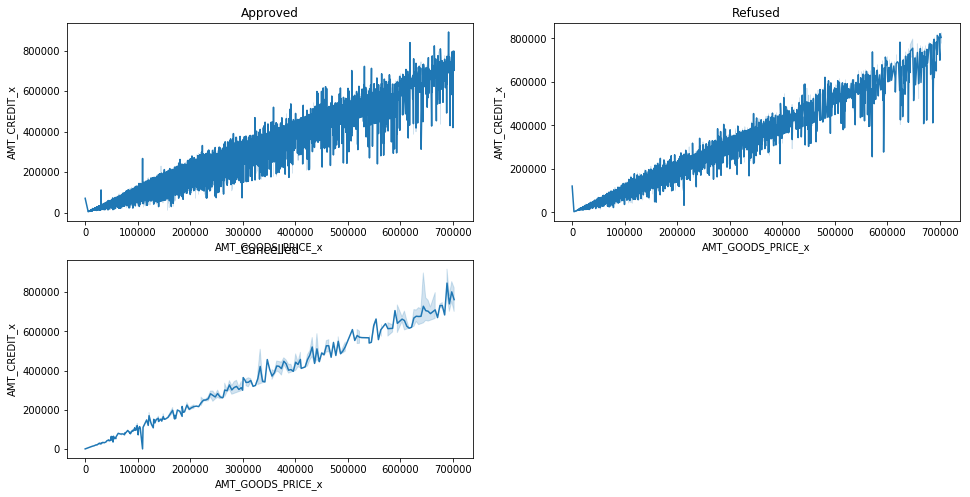

In [121]:
# Scatter

plt.figure(figsize = (16, 8))
plt.subplot(2,2,1)
plt.title("Approved")
sns.lineplot(x='AMT_GOODS_PRICE_x',y='AMT_CREDIT_x',data=df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.lineplot(df_refu['AMT_GOODS_PRICE_x'], df_refu['AMT_CREDIT_x'])

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.lineplot(df_canc['AMT_GOODS_PRICE_x'], df_canc['AMT_CREDIT_x'])

C:\Users\veins\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


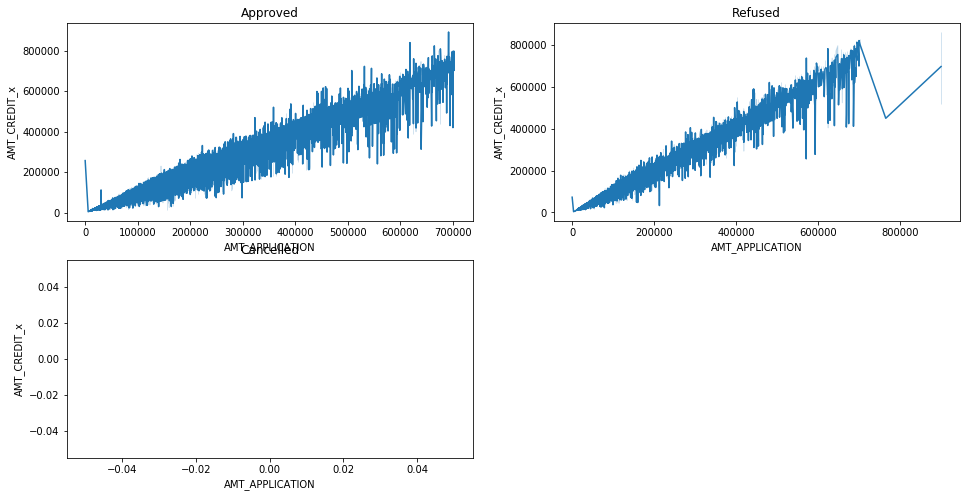

In [122]:
# Scatter

plt.figure(figsize = (16, 8))
plt.subplot(2,2,1)
plt.title("Approved")
sns.lineplot(x='AMT_APPLICATION',y='AMT_CREDIT_x',data=df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.lineplot(df_refu['AMT_APPLICATION'], df_refu['AMT_CREDIT_x'])

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.lineplot(df_canc['AMT_APPLICATION'], df_canc['AMT_CREDIT_x'])

### **3.BIVARIATE-CONTI-CATEGORICAL**

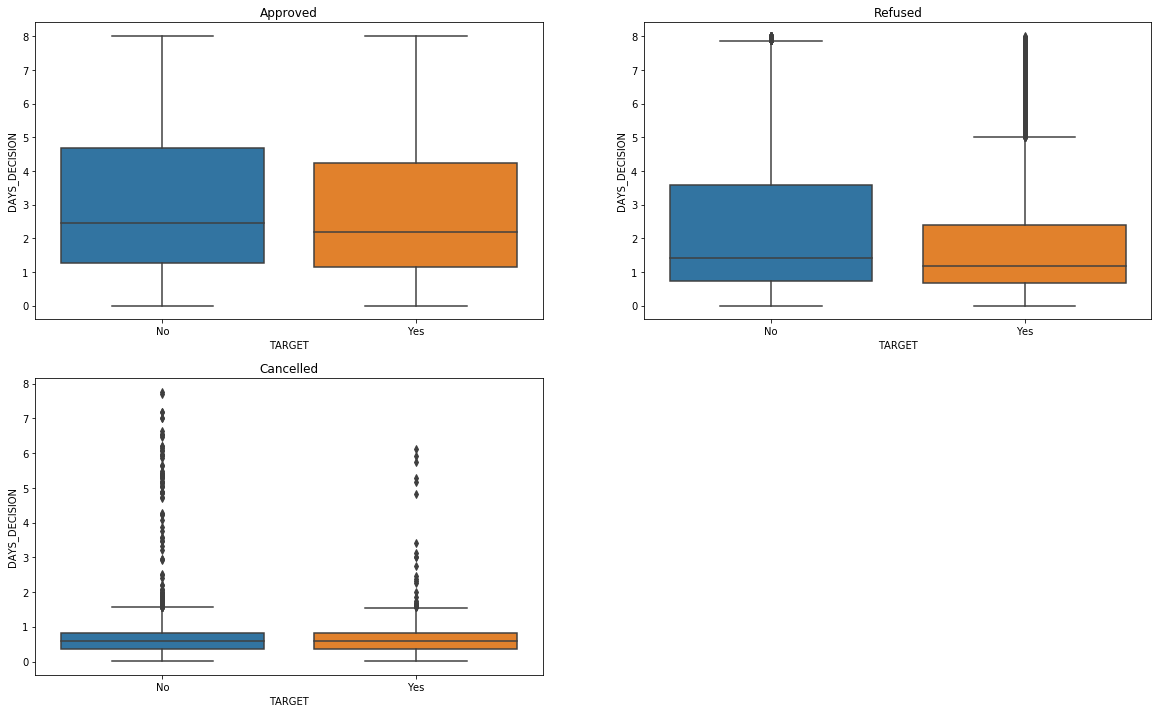

In [146]:
# Bivariate - Continuous-Categorical
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(x = "TARGET", y = 'DAYS_DECISION', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.boxplot(x = "TARGET", y = 'DAYS_DECISION', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.boxplot(x = "TARGET", y = 'DAYS_DECISION', data = df_canc)

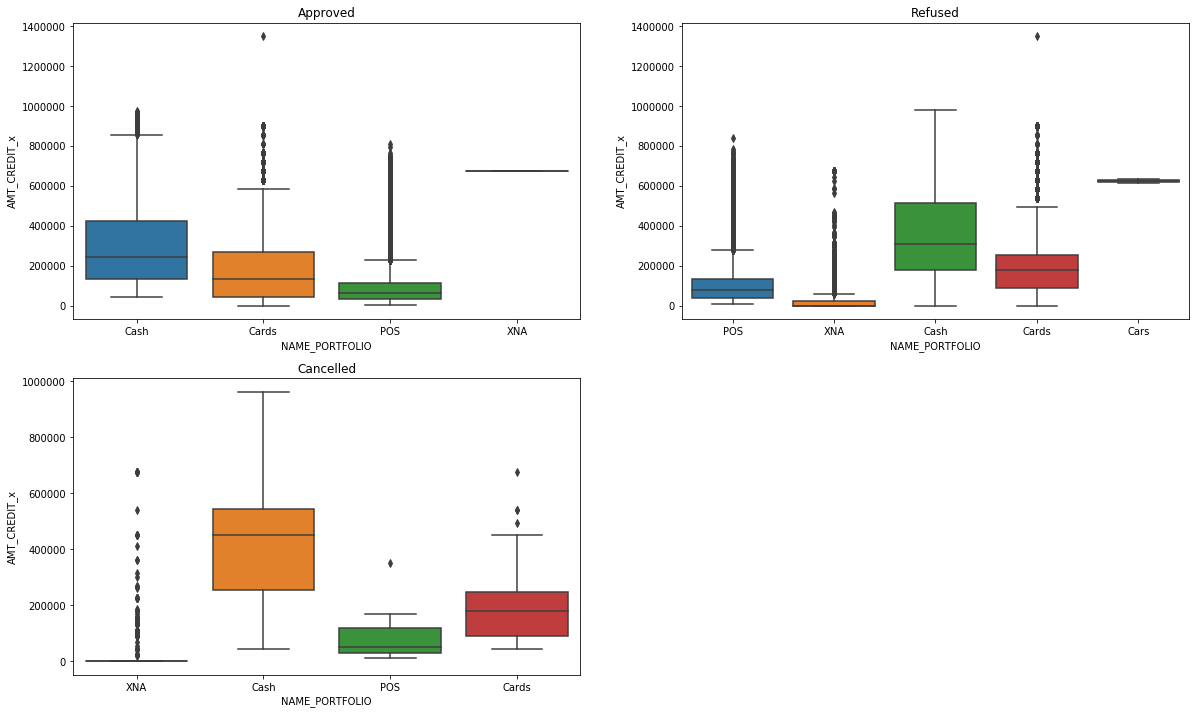

In [158]:
# Bivariate - Continuous-Categorical
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(x = "NAME_PORTFOLIO", y = 'AMT_CREDIT_x', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.boxplot(x = "NAME_PORTFOLIO", y = 'AMT_CREDIT_x', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.boxplot(x = "NAME_PORTFOLIO", y = 'AMT_CREDIT_x', data = df_canc)


**CONCLUSION** - The maximum amount of credit loans were taken for the NAME_PORTFOLIO as "CASH"

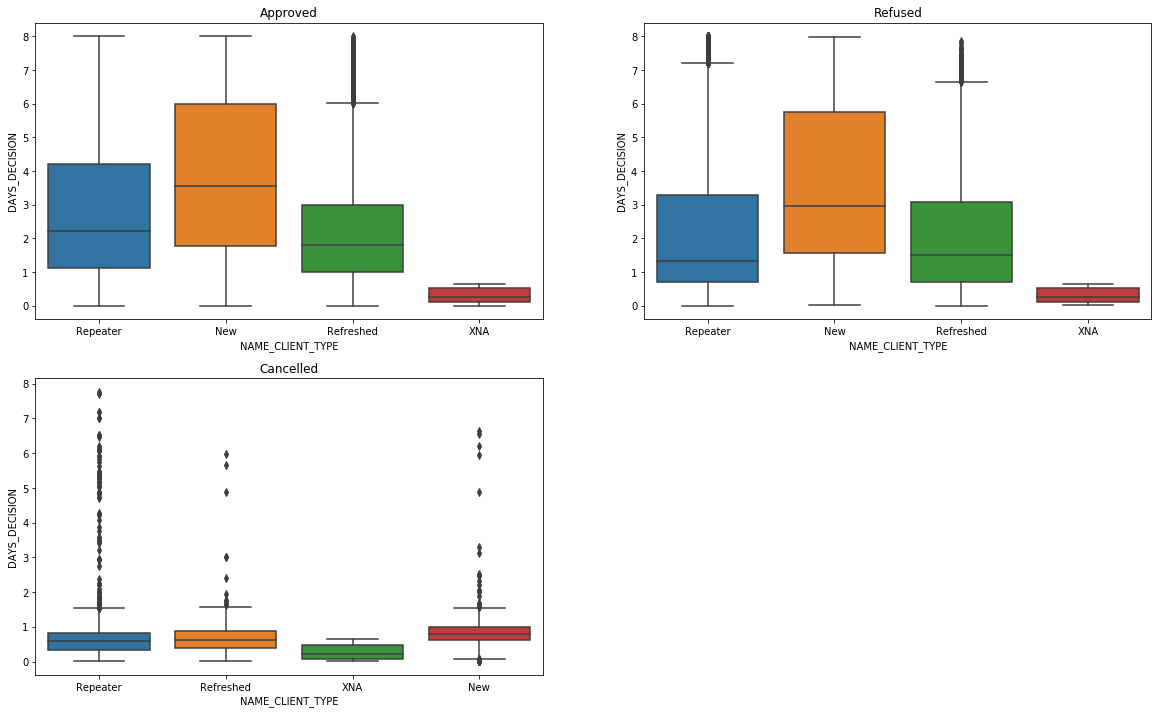

In [153]:
# Bivariate - Continuous-Categorical
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(x = "NAME_CLIENT_TYPE", y = 'DAYS_DECISION', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.boxplot(x = "NAME_CLIENT_TYPE", y = 'DAYS_DECISION', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.boxplot(x = "NAME_CLIENT_TYPE", y = 'DAYS_DECISION', data = df_canc)

**CONCLUSION** - New CLients have a higher number of decision days in comparison to the older clients ie for newer clients the the relative time taken for a decision on previous application is much higher than the older clients as they may be involved in paperworks and other parameters which may impact their loan approval.

### **5.BIVARIATE-CATEGORICAL-CATEGORICAL**

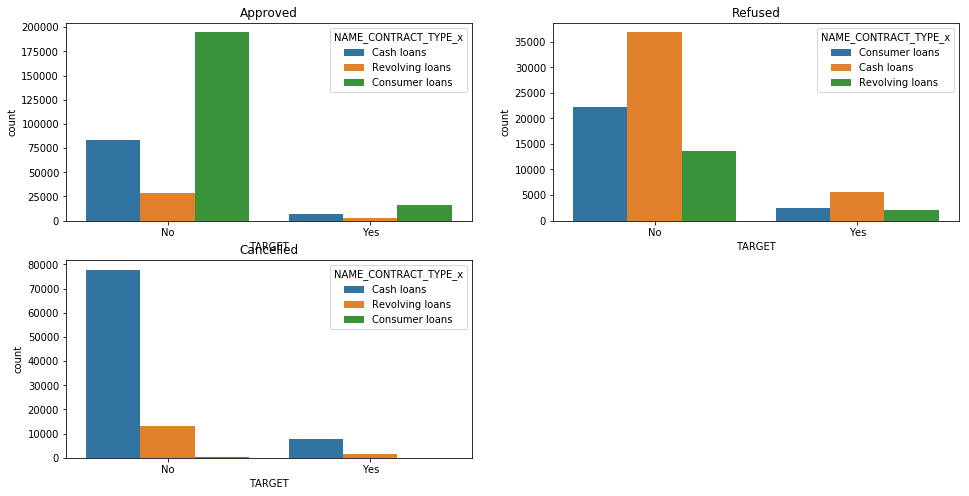

In [147]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (16, 8))
plt.subplot(2,2,1)
plt.title("Approved")
sns.countplot(x = "TARGET", hue = 'NAME_CONTRACT_TYPE_x', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.countplot(x = "TARGET", hue = 'NAME_CONTRACT_TYPE_x', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.countplot(x = "TARGET", hue = 'NAME_CONTRACT_TYPE_x', data = df_canc)

**CONCLUSION** - 
- From the above analysis we can see that people who have approved previous loans and belong to the category of consumer loans tend to default the maximum.
- People who have been refused previous loans and have taken cash loans tends to belong to non-default category. A possible reason may be they have been rejected a loan multiple times and hence once they get the loan they will not be willing to take a risk to come under defaulter category and hence get rejected again in future.

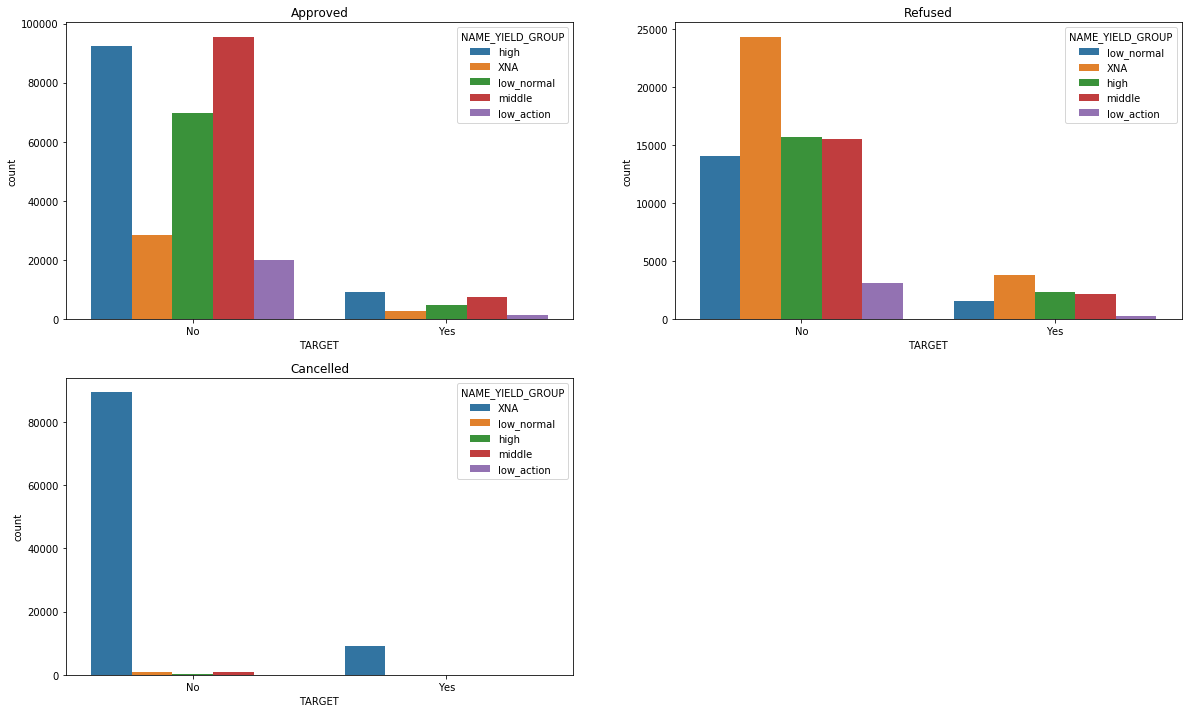

In [126]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.countplot(x = "TARGET", hue = 'NAME_YIELD_GROUP', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.countplot(x = "TARGET", hue = 'NAME_YIELD_GROUP', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.countplot(x = "TARGET", hue = 'NAME_YIELD_GROUP', data = df_canc)

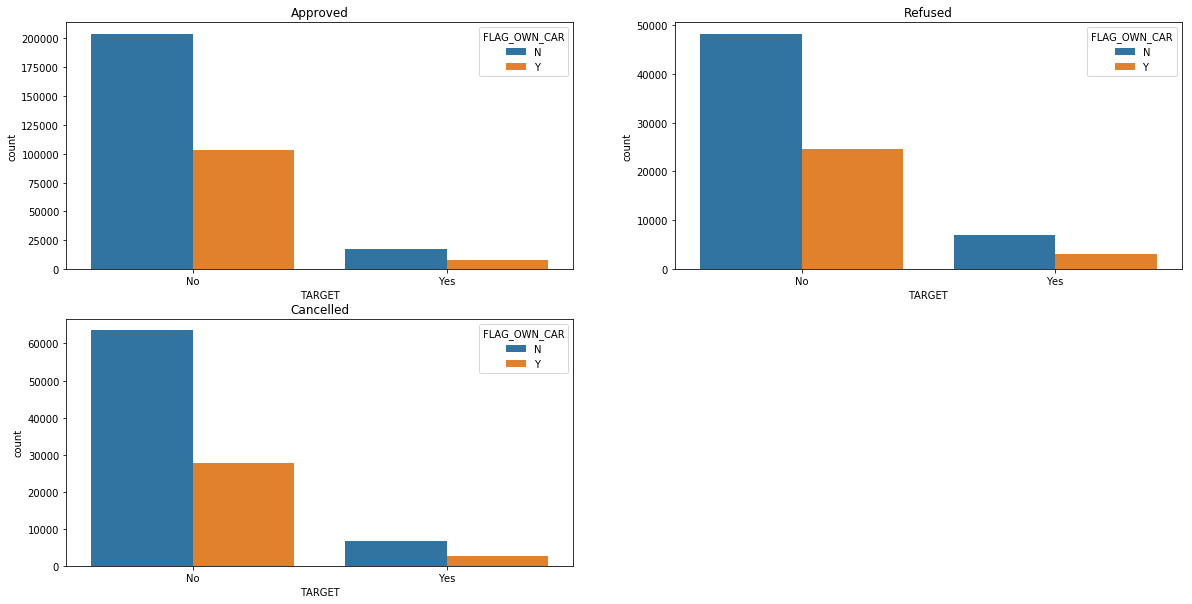

In [143]:
# Bivariate - Categorical-Categorical
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
plt.title("Approved")
sns.countplot(x = "TARGET", hue = 'FLAG_OWN_CAR', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.countplot(x = "TARGET", hue = 'FLAG_OWN_CAR', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.countplot(x = "TARGET", hue = 'FLAG_OWN_CAR', data = df_canc)

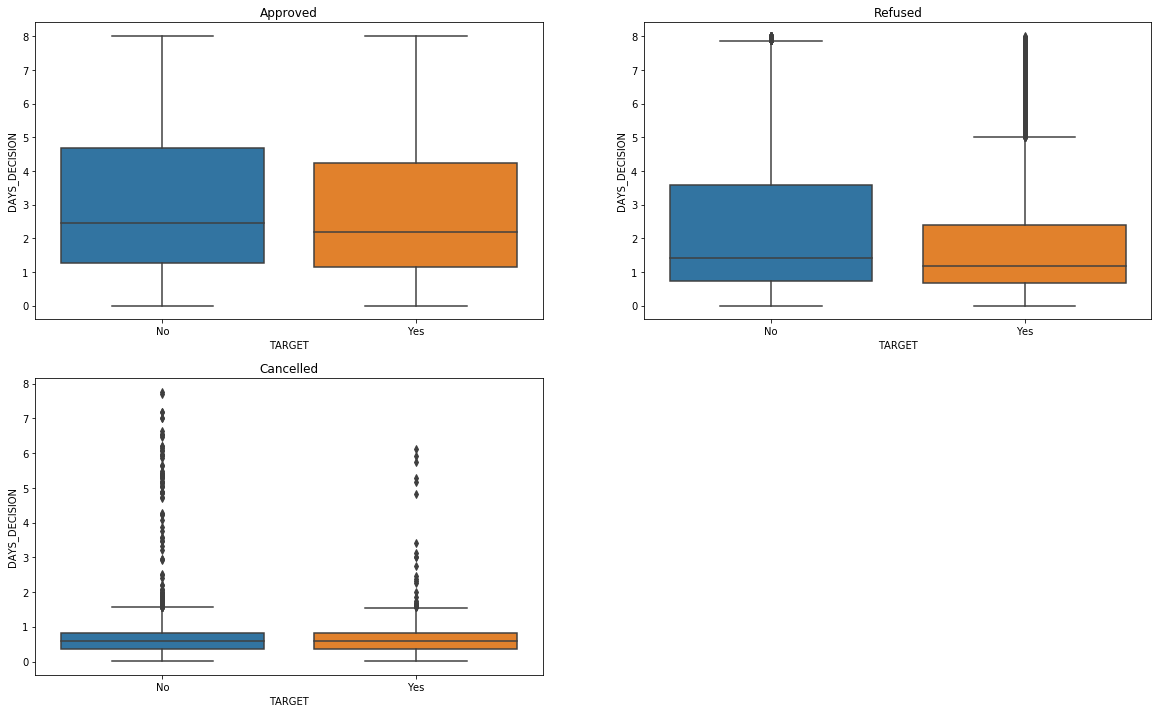

In [161]:
# Bivariate - Continuous-Categorical
plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(x = "TARGET", y = 'DAYS_DECISION', data = df_appr)


plt.subplot(2,2,2)
plt.title("Refused")
sns.boxplot(x = "TARGET", y = 'DAYS_DECISION', data = df_refu)

plt.subplot(2,2,3)
plt.title("Cancelled")
sns.boxplot(x = "TARGET", y = 'DAYS_DECISION', data = df_canc)

# **FINAL_CONCLUSION**

### **DRIVING VARIABLES FOR TARGET**

- NAME_CONTRACT_TYPE_x
- EXT_SOURCE_1
- EXT_SOURCE_2
- Age_Bucket
- NAME_INCOME_TYPE
- OCCUPATION_TYPE
REGION_POPULATION_RELATIVE vs AMT_INCOME_TOTAL
NAME_CONTRACT_STATUS